## SNR tests

The Annecy 2022 event will be chosen as an example to investigate precisely the SNR calculation, and based on this the filtering of stations prior to any further processing.

Generally body wave phase picks are defined by their velocity or tauPy picker, for the Lg wave there is a velocity window set, which is why the windows have different lengths.

We will investigate in this the different SNR of different phases, check how the decrease in SNR behaves over distance, and find two regimes which can be set. Subsequently, we will see how the cutoff distance behaves, and if the coda window, which is set based on this cutoff distance, is adequate (plot traces with time window marked.)

#### Defining variables and reading in data for event

In [1]:
from obspy import UTCDateTime

minlat = 37
maxlat = 50.0
minlon = -5
maxlon = 17




minmag = 3.5
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.

vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
print(vPg)
#vPg=6.

tminCoda=300.
tmaxCoda=320.

5.7


In [2]:

event_name='Rhone Valley' # quite good Lg wave arrivals, however velocity not well defined
event_name='Adriatic' # a regarder
event_name='Appennines'#data?
event_name='Vierzon' #data?
event_name='LaRochelle_X7west'
event_name='Genova' #data?
event_name='Friul' 
event_name='France_west' # newly added
event_name='France_Rochemaure' # newly added
event_name='France_X7center'  #data?
event_name='Spain_3_X7west' #data?
event_name='Spain_1_X7west'
event_name='France_east_2014' #newly added
event_name='Massif Central' # a regarder
event_name='France_east_2012' #newly added
event_name='France_north_east_2003' #newly added
event_name='Albertville_2022' # newly added


if event_name == 'France_north_east_2003':
    start = UTCDateTime("2003-02-22T20:31:03")
    end = UTCDateTime("2003-02-22T20:51:03")

if event_name == 'France_east_2012':
    start = UTCDateTime("2012-03-02T07:10:50 ")
    end = UTCDateTime("2012-03-02T08:10:50 ")





if event_name == 'France_east_2014':
    start = (UTCDateTime("2014-04-07T19:20:00"))
    end = (UTCDateTime("2014-04-07T20:20:00"))


if event_name == 'Spain_1_X7west'  :
    start = UTCDateTime("2013-01-09") #Spain_1_X7west M3.7
    end = UTCDateTime("2013-01-10")   #

if event_name == 'Spain_3_X7west'  :
    start = UTCDateTime("2013-04-04") #Spain_3_X7west M3.9
    end = UTCDateTime("2013-04-05")   #


if event_name == 'France_X7center'  :
    start = UTCDateTime("2014-01-25") #France_X7center M3.9
    end = UTCDateTime("2014-01-26")   #



if event_name == 'France_Rochemaure' :
    start = UTCDateTime("2019-11-11 10:50:46 ") #magnitude 4.9
    end = UTCDateTime("2019-11-11 10:55:46 ")


if event_name == 'France_west'  :
    start = UTCDateTime("2013-11-21 09:50:06") #France_west M3.7
    end = UTCDateTime("2013-11-21 10:00:06")   #


if event_name == 'Genova'  :
    start = UTCDateTime("2022-02-28") #Genova event
    end = UTCDateTime("2022-03-01")   #Genova event M4.0


if event_name == 'LaRochelle_X7west'  :
    start = UTCDateTime("2013-03-06") #LaRochelle_X7west M3.8
    end = UTCDateTime("2013-03-07")   #

if event_name == 'Friul' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event



if event_name == 'Appennines' :
    start = UTCDateTime("2022-02-01T22:06:00")   #Appennines M3.7 event
    end = UTCDateTime("2022-02-01T23:08:00") #Appennines M3.7 event



if event_name == 'Vierzon'  :
    start = UTCDateTime("2013-09-25") #Vierzon
    end = UTCDateTime("2013-09-26")   #
    


if event_name == 'Adriatic' :
    start = UTCDateTime("2022-11-09T06:06:00")   #Adriatic M5.6event
    end = UTCDateTime("2022-11-09T06:08:00") #Adriatic M5.6 event

if event_name == 'Annecy_2022'  :
    start = UTCDateTime("2022-03-12 17:00:22 ") #Annecy 2022 event M4.2
    end = UTCDateTime("2022-03-12 17:13:22 ")

if event_name == 'Massif Central' :
    start = UTCDateTime("2022-05-09T11:11:00")   #massif central
    end = UTCDateTime("2022-05-09T11:16:00") #massif central M4.0

if event_name == 'Rhone Valley' :
    start = UTCDateTime("2019-11-11")   #rhone valley event
    end = UTCDateTime("2019-11-12") #rhone valley event

events_list = Client("USGS").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlon,
    maxlongitude=maxlon,
    minmagnitude=minmag,
    starttime=start,
    endtime=end
)
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events_list))
print(events_list.__str__(print_all=True))



eqo = events_list[0].origins[0]
eq_start = eqo.time
print(type(eq_start))
t_duration=500. #length of window to request
eq_end = eq_start + t_duration
eq_lat=eqo.latitude
print((eq_end))
eq_lon=eqo.longitude
eq_epi=(eq_lat,eq_lon)
degmin=1.9
degmax=10.
start = eq_start
end = eq_end
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
st_all, stations_all, plot = big_downloader2(datacenters,start,end,eq_lon,eq_lat,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot

NameError: name 'Client' is not defined

#### Applying a bandpass filter


In [13]:
fmin=3
fmax=6
f0=0.5*(fmin+fmax)

st_plot_filt_all=st_all.copy()
st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
print((st_plot_filt_all))

825 Trace(s) in Stream:

FR.ABJF.00.HHZ | 2022-03-12T17:03:22.560000Z - 2022-03-12T17:11:42.550000Z | 100.0 Hz, 50000 samples
...
(823 other traces)
...
CA.CCAS..HHZ | 2022-03-12T17:03:22.560000Z - 2022-03-12T17:11:42.550000Z | 100.0 Hz, 50000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


### Now start the SNR testing

First running SNR_all, which does all the processing steps, putting out the SNR ratios with the station info in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR_Pn, SNR_Pg, SNR_Sn, SNR_Lg), as well as the filtered stations with their amplitudes in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg).

In [20]:

filtered_stations_with_SNR, stations_with_snr, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=True)
print(tcoda_test)
amp_plot


calculating SNR for Pn  phase


/tmp/ipykernel_3018/1498188459.py:682: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_3018/1498188459.py:683: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Pg  phase


/tmp/ipykernel_3018/1498188459.py:714: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_3018/1498188459.py:715: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Sn  phase


/tmp/ipykernel_3018/1498188459.py:698: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_3018/1498188459.py:699: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Lg  phase


/tmp/ipykernel_3018/1498188459.py:666: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_3018/1498188459.py:667: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


Reduced from   700  stations to   480  stations due to insufficient SNR or distance >  712.7010201923562
coda window set from 308.837108750021-328.837108750021s
plotting Lg_Coda amplitudes
308.837108750021


### Coda time window

The time window is set specifically for each event, since it depends on the cutoff distance. 

1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07
1.1574229574762285e-07
1.1573865776881576e-07
1.1574229574762285e-07


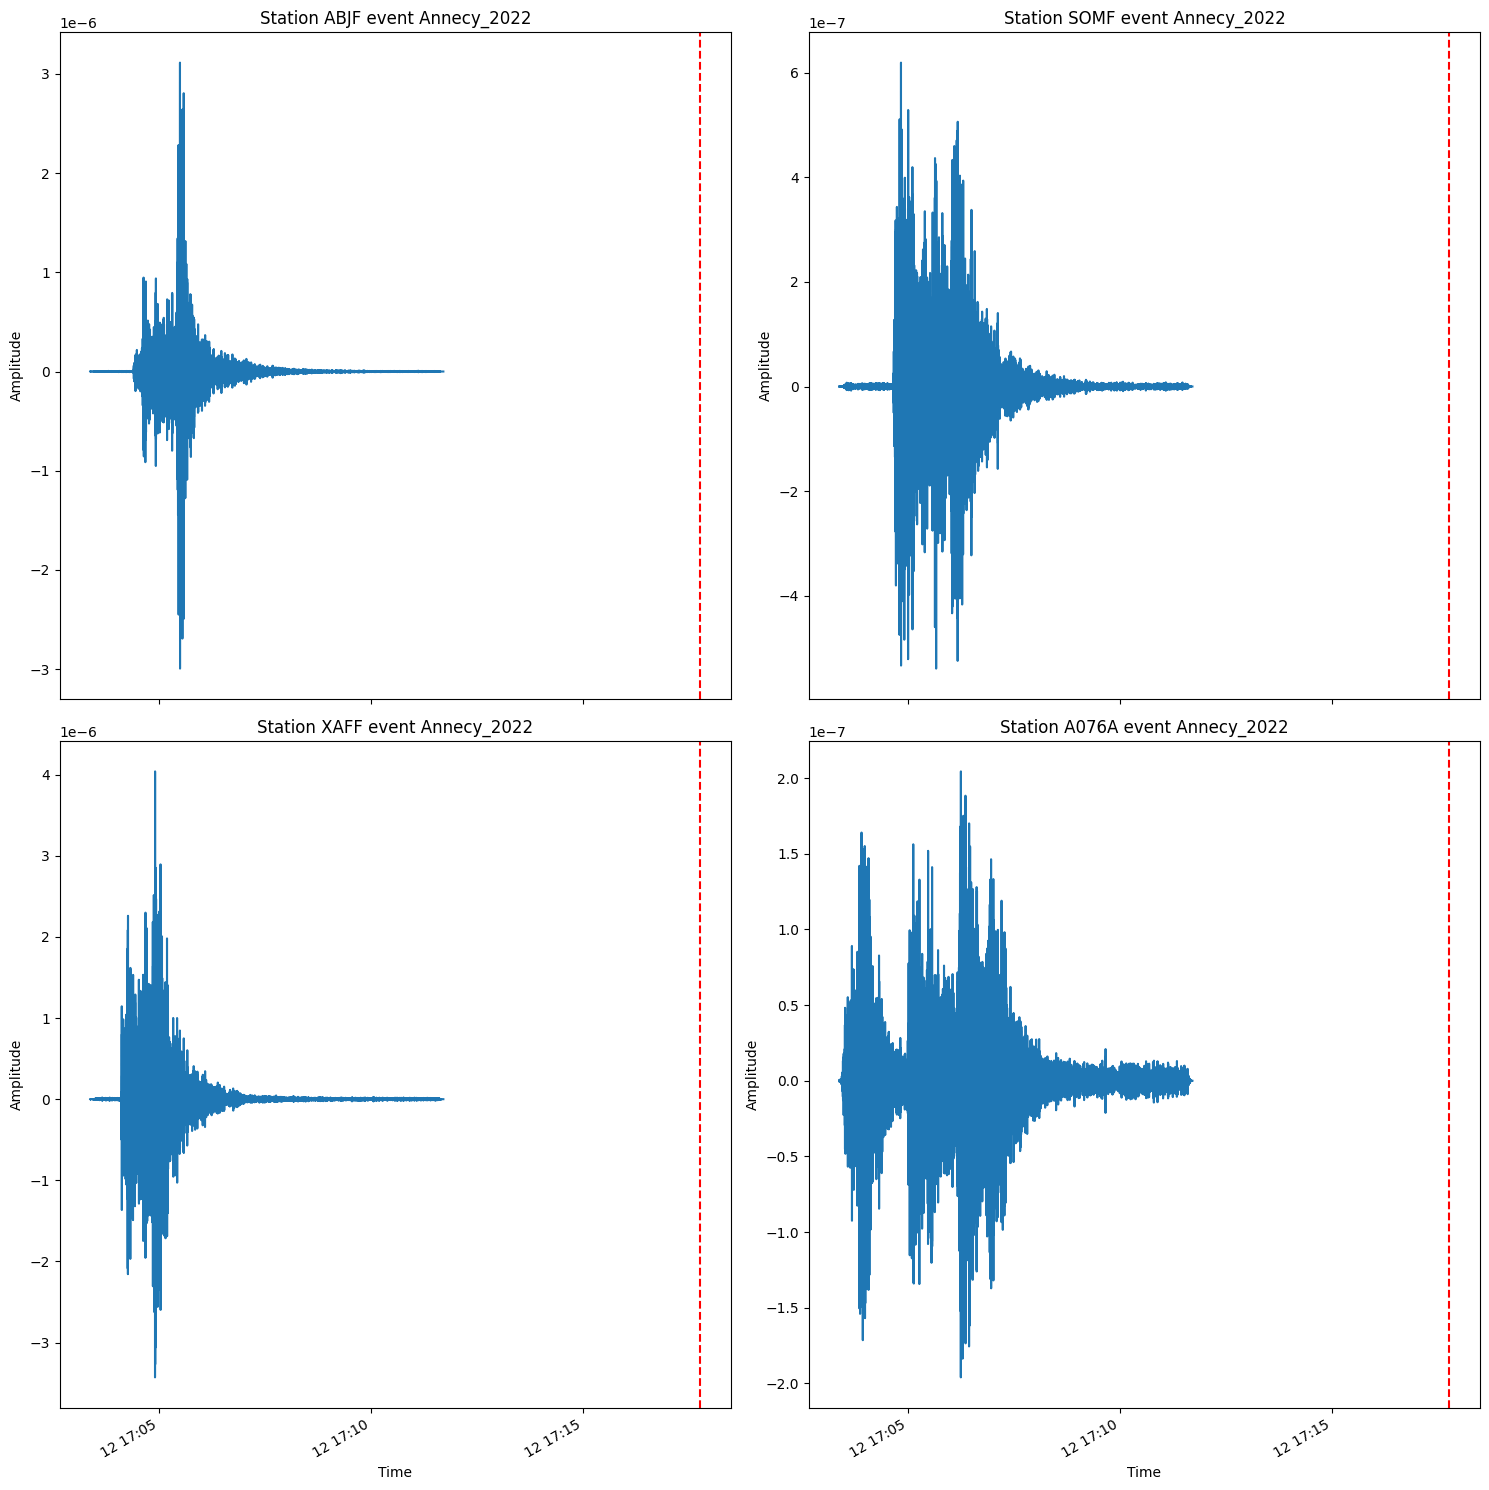

In [12]:

example_traces_idx = [0, 100, 120, 169]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, idx in enumerate(example_traces_idx):
    tr = st_plot_filt_all[idx]
    ax = axs[i // 2, i % 2]

    ax.plot(tr.times("matplotlib"), tr.data)
    coda_start = tr.times("matplotlib")[0] + 0.01
    coda_end = tr.times("matplotlib")[0] + 300
    print((tr.times("matplotlib")[1])-(tr.times("matplotlib")[0]))
    print((tr.times("matplotlib")[2])-(tr.times("matplotlib")[1]))
    print((tr.times("matplotlib")[3])-(tr.times("matplotlib")[2]))

    ax.axvline(coda_start, color='r', linestyle='--', label="start coda window")
    #ax.axvline(coda_end, color='r', linestyle='--', label="end coda window")  
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Station {tr.stats.station} event {event_name}')
    ax.xaxis_date()
    fig.autofmt_xdate()

plt.tight_layout()
plt.show()




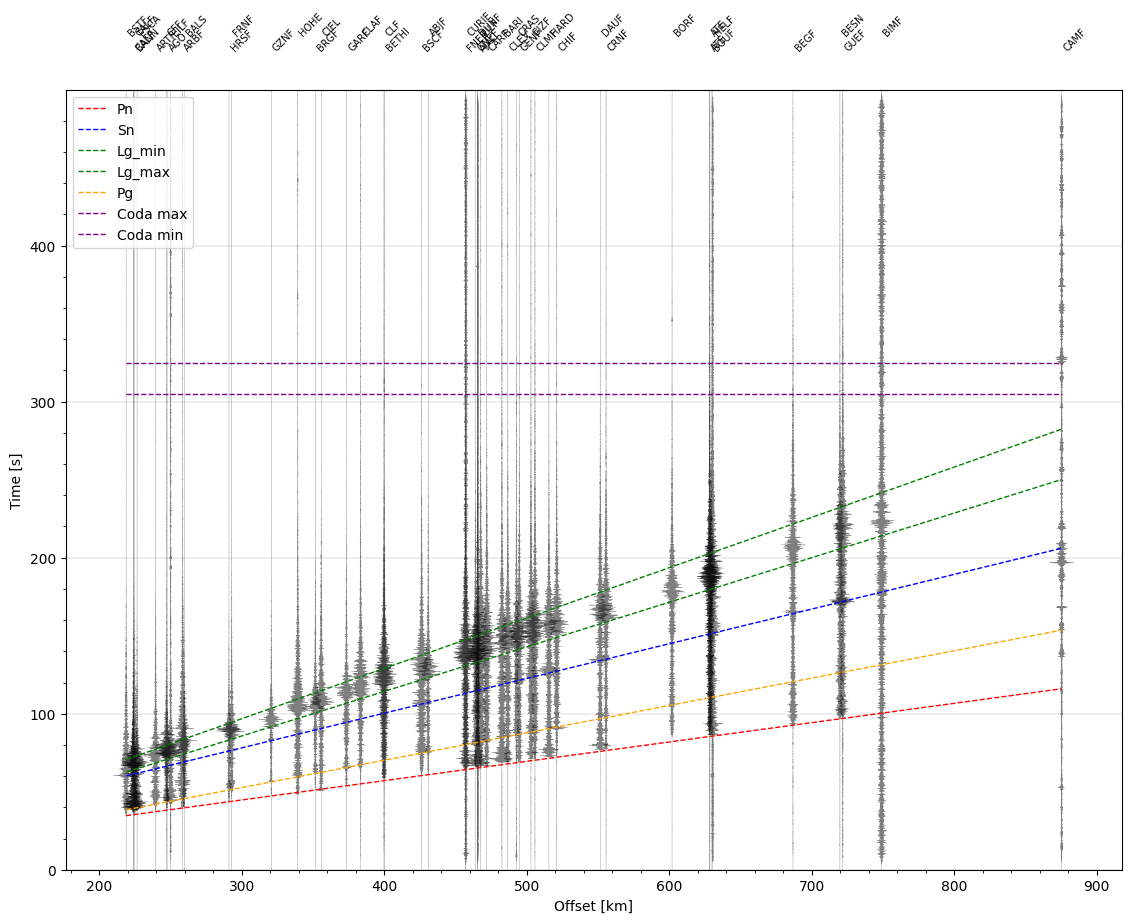

304.8159467493013


In [13]:
plot, st_Lg0 = plot_record_section(st_plot_filt_all[0:50], stations_all[0:50], eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max, 
v_Pg=vPg,tmincoda=tcoda_test,tmaxcoda=tcoda_test+20)
print(tcoda_test)

### Checking behaviour of body wave phase SNR

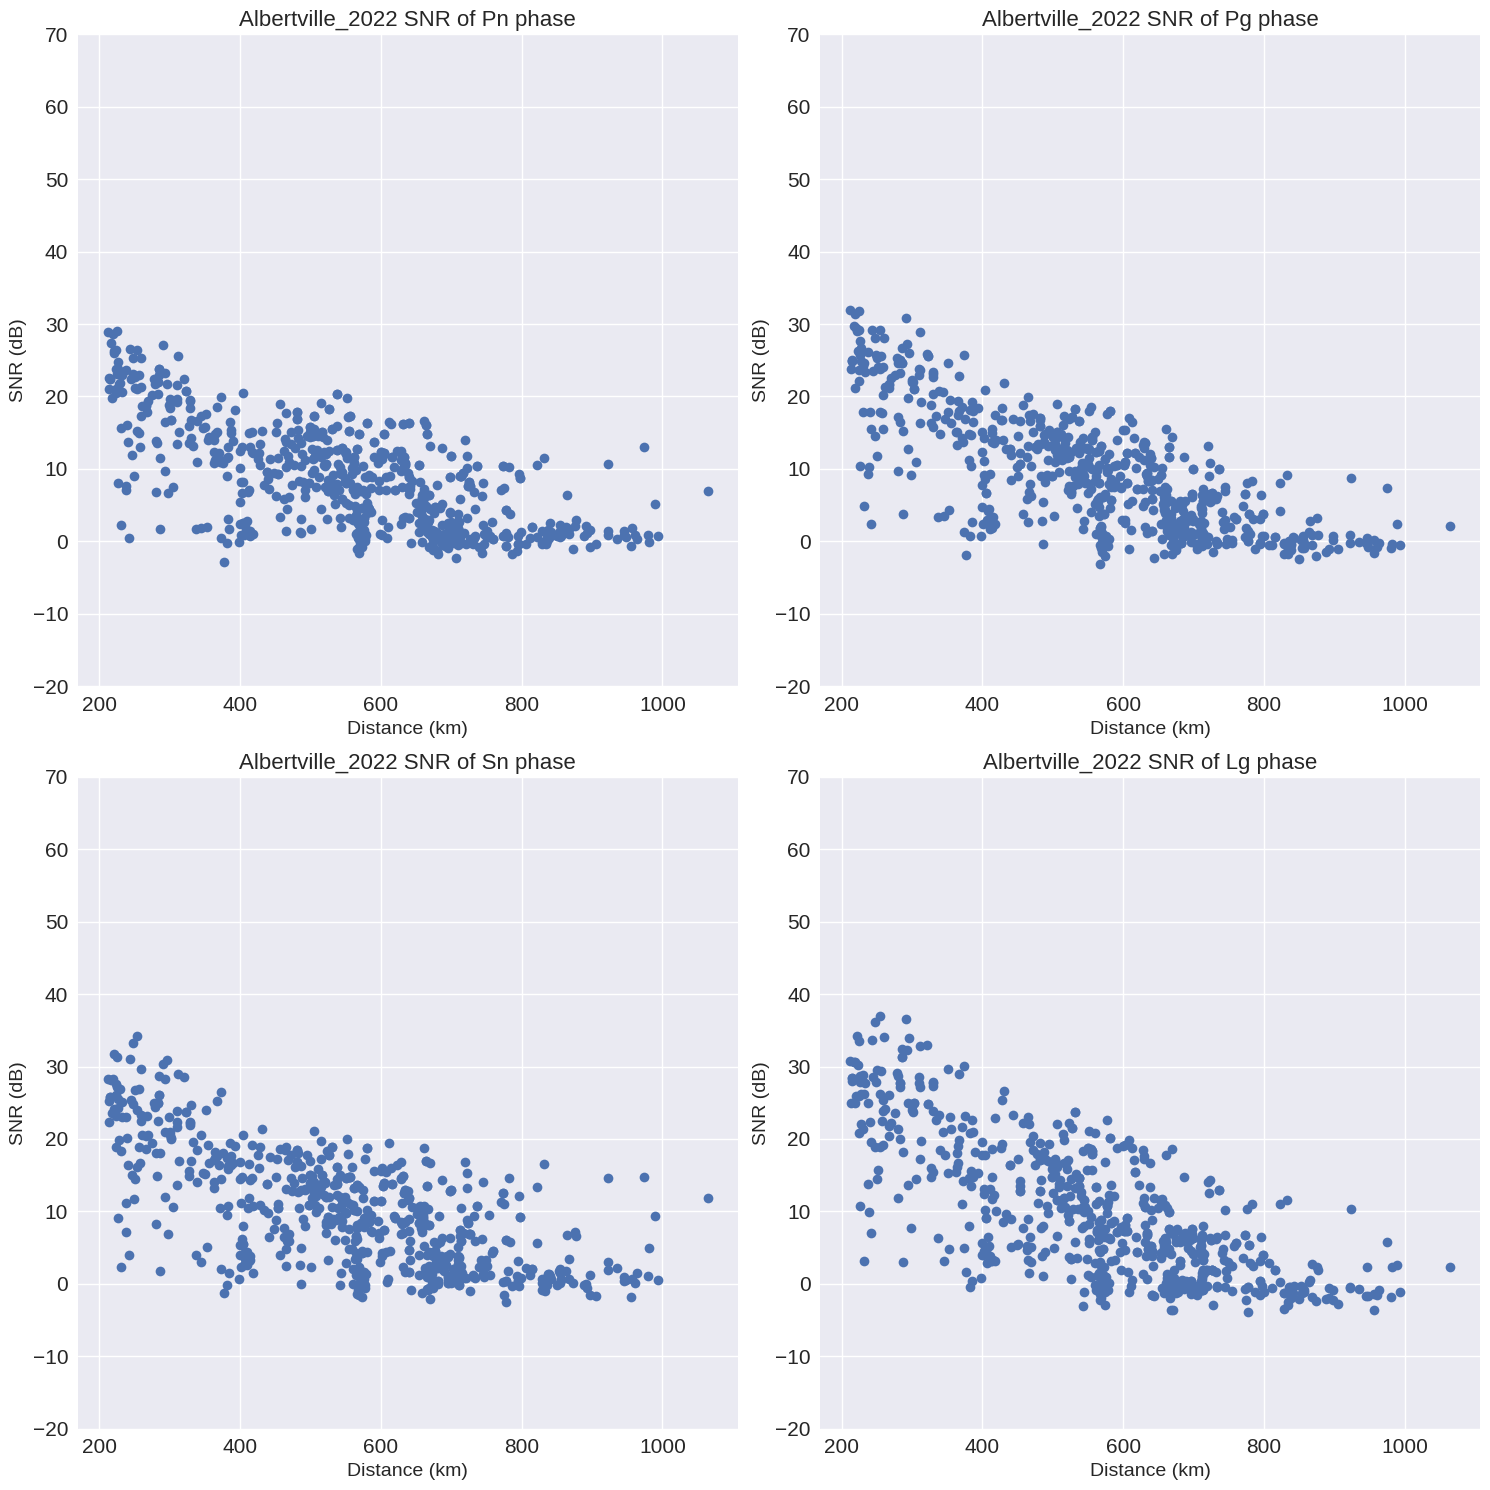

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')
phases = ['Pn', 'Pg', 'Sn', 'Lg']
for i in range(10, 14):
    SNR_vals = stations_with_snr[:, i].astype(float)
    dist_vals = stations_with_snr[:, 5].astype(float) / 1000.
    
    ax = axs[(i-10)//2, (i-10)%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_ylim([-20, 70])
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('SNR (dB)', fontsize=14)
    ax.set_title(f'{event_name} SNR of {phases[i-10]} phase', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
plt.show()


#### Segment SNR/Distance in two regimes
There can be two regimes introduced, one where there is direct energy of the incoming wave, and one where there is no more energy, thus low SNR values. Finding the cutoff distance for the different bodywave, which corresponds to this change in regimes, is integral in defining the time window for the coda waves, as for this we need a time window without onset of energy from direct phases, and with energy of only scattered waves.

calculating SNR for Lg  phase


/tmp/ipykernel_3831/3147369857.py:880: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:873: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_3831/3147369857.py:874: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:880: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 725.9252013970898
calculating SNR for Pn  phase


/tmp/ipykernel_3831/3147369857.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
/tmp/ipykernel_3831/3147369857.py:994: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
/tmp/ipykernel_3831/3147369857.py:896: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:889: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.t

Distance where 90% of SNR values are above 2: 775.4513159243444
calculating SNR for Sn  phase


/tmp/ipykernel_3831/3147369857.py:912: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:905: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_3831/3147369857.py:906: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:912: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 777.3464298385461
calculating SNR for Pg  phase


/tmp/ipykernel_3831/3147369857.py:928: RuntimeWarning: invalid value encountered in scalar divide
  snr = signal_power / noise_power
/tmp/ipykernel_3831/3147369857.py:921: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_3831/3147369857.py:922: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_3831/3147369857.py:928: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Distance where 90% of SNR values are above 2: 748.4341438171216


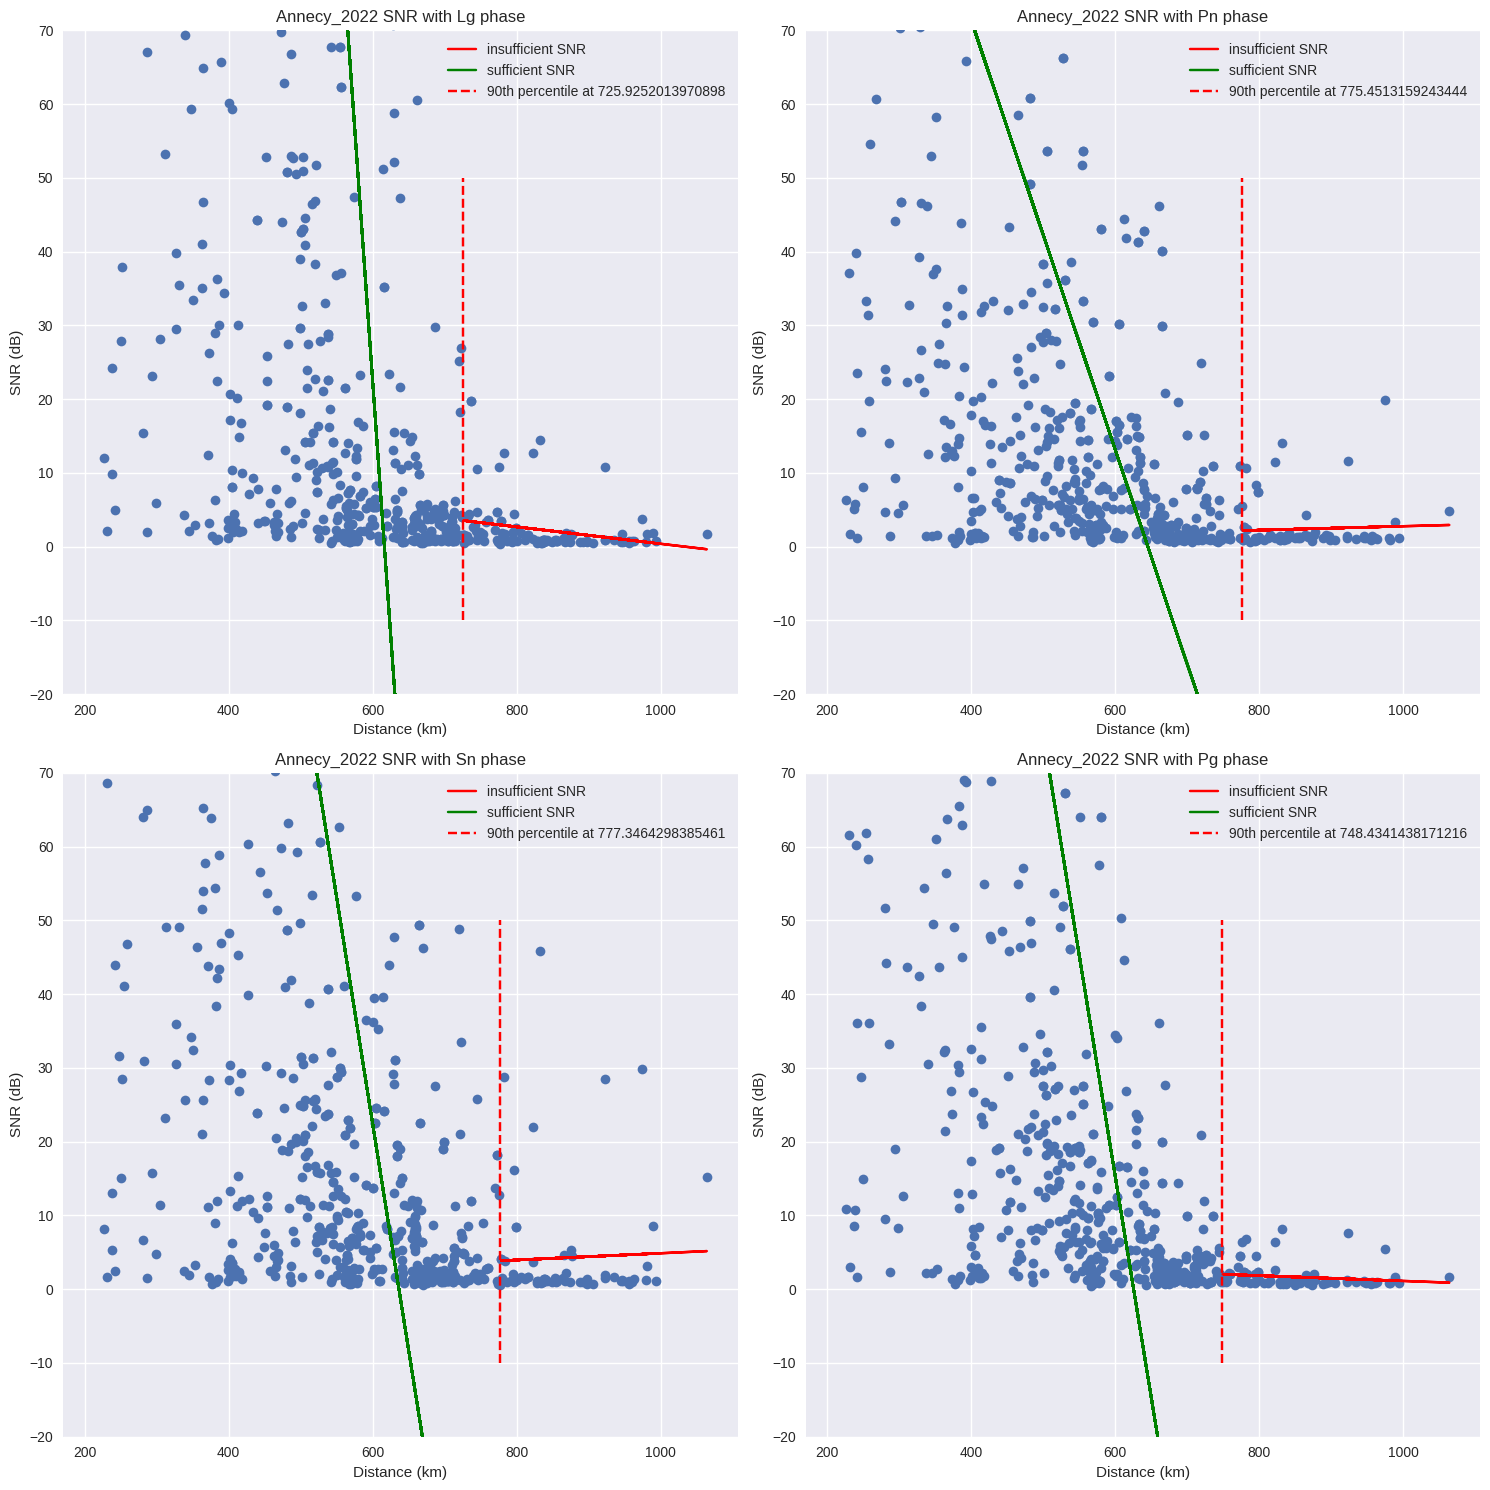

In [31]:
SNR_distance_threshold = SNR_distance(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
                 Dtmin_Noise, Dtmax_Noise, eq_start, dB=False)

In [17]:
for key, values in distance_dict.items():
    if isinstance(values, dict) and 'percentile_distance' in values:
        print(f"Cutoff distance at phase {key}: {values['percentile_distance']}")



Cutoff distance at phase Pn: 697.8030223514552
Cutoff distance at phase Pg: 699.4164330786493
Cutoff distance at phase Sn: 713.0447912958274
Cutoff distance at phase Lg: 697.9251804557167


#### Streamline the process to have more datapoints of earthquakes

In [ ]:
import json
import pandas as pd
catalogue = pd.read_csv('/home/schreinl/Stage/Data/eq_4_france.csv') 
directory='/home/schreinl/Stage/Data/'
datacenters =['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
distmin=1.9
distmax=10.
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.
vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
snr_threshold = 1.5
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
for i in range(len(catalogue)):
    print(f'Processing earthquake {i+1} out of {len(catalogue)}')

    start = UTCDateTime(catalogue['time'][i])
    eq_start = start
    end = start + 400
    eq_lon = float(catalogue['longitude'][i])
    eq_lat = float(catalogue['latitude'][i])

    # Start downloading routine
    st_all, stations_all, plot = big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory, plot=False)
    #filter data
    fmin=3
    fmax=6
    f0=0.5*(fmin+fmax)
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    st_plot_filt_all=st_all.copy()
    st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
    #run SNR and station filtering routine
    filtered_stations_with_SNR, stations_with_SNR, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,snr_threshold=snr_threshold,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=True)

    with open(f"{directory}/Dicts/{time_string}_{snr_threshold}_thresh_dict.txt", "w") as file:
        json.dump(distance_dict, file, indent=4)
    
    # Create plot of azimuth dependency of SNR
    #10: 'Pn', 11: 'Pg', 12: 'Sn', 13: 'Lg'
    snr_az_sn = snr_azimuth(stations_with_SNR, column=12, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_pn = snr_azimuth(stations_with_SNR, column=10, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_pg = snr_azimuth(stations_with_SNR, column=11, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    snr_az_lg = snr_azimuth(stations_with_SNR, column=13, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)

    # Save stations_with_amps to a file
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_stations_with_amps.txt", "w") as ampls:
        json.dump(stations_with_amps.tolist(), ampls, indent=4)
    
    # Save filtered stations with their corresponding SNR
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_filtered_stations_SNR.txt", "w") as snrfile:
        json.dump(filtered_stations_with_SNR.tolist(), snrfile, indent=4)
    
    # Save the stations with SNR, unfiltered
    with open(f"{directory}/{time_string}/{time_string}_unfiltered_stations_SNR.txt", "w") as unsnrfile:
        json.dump(stations_with_SNR.tolist(), unsnrfile, indent=4)


#### Routine but with error handling

In [8]:
import json
import pandas as pd
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.header import FDSNNoDataException

catalogue = pd.read_csv('/home/schreinl/Stage/Data/eq_4_france.csv') 
directory = '/home/schreinl/Stage/Data/'
datacenters = ['RESIF', 'ODC', 'ETH', 'INGV', 'GEOFON', 'BGR', 'IRIS', 'ICGC']
distmin = 1.9
distmax = 10.
Dtmin_Noise = -25
Dtmax_Noise = -5
Dtmin_Pn = -5.
Dtmax_Pn = 10.
Dtmin_Sn = -5.
Dtmax_Sn = 10.
vLg_max = 3.5
vLg_min = 3.1
vLg = 0.5 * (vLg_max + vLg_min)
vPg_max = 6.2
snr_threshold = 2
vPg_min = 5.2
vPg = 0.5 * (vPg_max + vPg_min)

for i in range(len(catalogue)):
    print(f'Processing earthquake {i+1} out of {len(catalogue)}')

    try:
        start = UTCDateTime(catalogue['time'][i])
        eq_start = start
        end = start + 400
        eq_lon = float(catalogue['longitude'][i])
        eq_lat = float(catalogue['latitude'][i])

        # Start downloading routine
        st_all, stations_all, plot = big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory, plot=False)

    except FDSNNoDataException:
        print(f"No data available for earthquake {i+1}, skipping...")
        continue  # Skip to the next earthquake

    # Filter data
    fmin = 3
    fmax = 6
    f0 = 0.5 * (fmin + fmax)
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    st_plot_filt_all = st_all.copy()
    st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)

    # Run SNR and station filtering routine
    filtered_stations_with_SNR, stations_with_SNR, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(
        stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn,
        vLg_min, vLg_max, vPg_min, vPg_max, tminCoda, tmaxCoda,
        Dtmin_Noise, Dtmax_Noise, eq_start, eq_lat, eq_lon,
        snr_threshold=snr_threshold, plot_SNR=False, plot_amps=True, wavecode="Lg_Coda", dB=True
    )

    with open(f"{directory}/Dicts/{time_string}_{snr_threshold}_thresh_dict.txt", "w") as file:
        json.dump(distance_dict, file, indent=4)

    # Create plot of azimuth dependency of SNR
    #snr_az_sn = snr_azimuth(stations_with_SNR, column=12, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    #snr_az_pn = snr_azimuth(stations_with_SNR, column=10, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    #snr_az_pg = snr_azimuth(stations_with_SNR, column=11, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)
    #snr_az_lg = snr_azimuth(stations_with_SNR, column=13, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name=time_string, savefig=True, show=False)

    # Save stations_with_amps to a file
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_stations_with_amps.txt", "w") as ampls:
        json.dump(stations_with_amps.tolist(), ampls, indent=4)

    # Save filtered stations with their corresponding SNR
    with open(f"{directory}/{time_string}/{time_string}_{snr_threshold}_thresh_filtered_stations_SNR.txt", "w") as snrfile:
        json.dump(filtered_stations_with_SNR.tolist(), snrfile, indent=4)

    # Save the stations with SNR, unfiltered
    with open(f"{directory}/{time_string}/{time_string}_unfiltered_stations_SNR.txt", "w") as unsnrfile:
        json.dump(stations_with_SNR.tolist(), unsnrfile, indent=4)


Processing earthquake 1 out of 95
Earthquake at 2025-01-12T13:51:40.650000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 35.59it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   733  stations to   521  stations due to insufficient SNR or distance >  844.4036794107288
coda window set from 365.9082610779825-385.9082610779825s
plotting Lg_Coda amplitudes
Processing earthquake 2 out of 95
Earthquake at 2024-06-04T00:34:32.581000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.56it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   559  stations to   406  stations due to insufficient SNR or distance >  733.03248326201
coda window set from 317.64740941353773-337.64740941353773s
plotting Lg_Coda amplitudes
Processing earthquake 3 out of 95
Earthquake at 2024-03-27T21:19:37.385000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 32.85it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   777  stations to   635  stations due to insufficient SNR or distance >  893.249633993918
coda window set from 387.0748413973645-407.0748413973645s
plotting Lg_Coda amplitudes
Processing earthquake 4 out of 95
Earthquake at 2024-02-17T00:23:29.997000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 24.99it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   818  stations to   378  stations due to insufficient SNR or distance >  603.5743690328873
coda window set from 261.5488932475845-281.5488932475845s
plotting Lg_Coda amplitudes
Processing earthquake 5 out of 95
Earthquake at 2024-02-09T12:06:22.712000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 25.07it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   771  stations to   562  stations due to insufficient SNR or distance >  763.1899691927985
coda window set from 330.71565331687935-350.71565331687935s
plotting Lg_Coda amplitudes
Processing earthquake 6 out of 95
Earthquake at 2023-11-21T05:52:05.341000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.05it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   776  stations to   383  stations due to insufficient SNR or distance >  703.1710372345018
coda window set from 304.7074494682841-324.7074494682841s
plotting Lg_Coda amplitudes
Processing earthquake 7 out of 95
Earthquake at 2023-10-28T15:29:22.789000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.71it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   787  stations to   594  stations due to insufficient SNR or distance >  796.2804285806709
coda window set from 345.05485238495737-365.05485238495737s
plotting Lg_Coda amplitudes
Processing earthquake 8 out of 95
Earthquake at 2023-09-18T03:10:14.744000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.46it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   779  stations to   651  stations due to insufficient SNR or distance >  857.6565007836261
coda window set from 371.65115033957136-391.65115033957136s
plotting Lg_Coda amplitudes
Processing earthquake 9 out of 95
Earthquake at 2023-09-18T02:38:03.893000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.37it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   778  stations to   524  stations due to insufficient SNR or distance >  784.2956541248632
coda window set from 339.86145012077407-359.86145012077407s
plotting Lg_Coda amplitudes
Processing earthquake 10 out of 95
Earthquake at 2023-06-16T16:38:28.069000Z with magnitude 4.8


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 28.00it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   611  stations to   523  stations due to insufficient SNR or distance >  1022.748690706551
coda window set from 443.1910993061721-463.1910993061721s
plotting Lg_Coda amplitudes
Processing earthquake 11 out of 95
Earthquake at 2023-05-16T06:24:21.041000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 25.55it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   739  stations to   448  stations due to insufficient SNR or distance >  720.2920687715435
coda window set from 312.1265631343356-332.1265631343356s
plotting Lg_Coda amplitudes
Processing earthquake 12 out of 95
Earthquake at 2023-03-22T14:50:33.025000Z with magnitude 4.4


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.58it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   717  stations to   540  stations due to insufficient SNR or distance >  699.300129866799
coda window set from 303.0300562756129-323.0300562756129s
plotting Lg_Coda amplitudes
Processing earthquake 13 out of 95
Earthquake at 2023-03-09T19:13:57.305000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 25.97it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   727  stations to   478  stations due to insufficient SNR or distance >  837.5530498943966
coda window set from 362.9396549542385-382.9396549542385s
plotting Lg_Coda amplitudes
Processing earthquake 14 out of 95
Earthquake at 2023-03-09T19:13:57.305000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.84it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   728  stations to   547  stations due to insufficient SNR or distance >  878.9357646142836
coda window set from 380.8721646661896-400.8721646661896s
plotting Lg_Coda amplitudes
Processing earthquake 15 out of 95
Earthquake at 2023-03-09T15:05:40.913000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.39it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   733  stations to   547  stations due to insufficient SNR or distance >  872.9207331619755
coda window set from 378.26565103685607-398.26565103685607s
plotting Lg_Coda amplitudes
Processing earthquake 16 out of 95
Earthquake at 2023-01-28T05:32:50.156000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   733  stations to   542  stations due to insufficient SNR or distance >  850.998742762155
coda window set from 368.7661218636005-388.7661218636005s
plotting Lg_Coda amplitudes
Processing earthquake 17 out of 95
Earthquake at 2023-01-26T10:45:41.139000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 28.32it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   739  stations to   500  stations due to insufficient SNR or distance >  808.0526292657605
coda window set from 350.15613934849625-370.15613934849625s
plotting Lg_Coda amplitudes
Processing earthquake 18 out of 95
Earthquake at 2022-12-05T14:43:29.273000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 29.77it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   723  stations to   329  stations due to insufficient SNR or distance >  720.313997937298
coda window set from 312.13606577282917-332.13606577282917s
plotting Lg_Coda amplitudes
Processing earthquake 19 out of 95
Earthquake at 2022-11-08T15:23:23.651000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.55it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   737  stations to   412  stations due to insufficient SNR or distance >  704.1748738822893
coda window set from 305.142445348992-325.142445348992s
plotting Lg_Coda amplitudes
Processing earthquake 20 out of 95
Earthquake at 2022-09-22T15:47:58.549000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.51it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   760  stations to   518  stations due to insufficient SNR or distance >  758.4719205323582
coda window set from 328.6711655640219-348.6711655640219s
plotting Lg_Coda amplitudes
Processing earthquake 21 out of 95
Earthquake at 2022-09-22T13:40:00.345000Z with magnitude 4.4


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.17it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   749  stations to   549  stations due to insufficient SNR or distance >  749.623961160118
coda window set from 324.83704983605116-344.83704983605116s
plotting Lg_Coda amplitudes
Processing earthquake 22 out of 95
Earthquake at 2022-07-09T11:47:29.334000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.85it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   702  stations to   517  stations due to insufficient SNR or distance >  834.5712630261684
coda window set from 361.6475473113397-381.6475473113397s
plotting Lg_Coda amplitudes
Processing earthquake 23 out of 95
Earthquake at 2022-05-09T11:13:38.180000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 25.64it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   791  stations to   402  stations due to insufficient SNR or distance >  832.6372756946433
coda window set from 360.80948613434543-380.80948613434543s
plotting Lg_Coda amplitudes
Processing earthquake 24 out of 95
Earthquake at 2022-04-19T15:49:07.097000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.72it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   778  stations to   464  stations due to insufficient SNR or distance >  729.3565681921208
coda window set from 316.05451288325236-336.05451288325236s
plotting Lg_Coda amplitudes
Processing earthquake 25 out of 95
Earthquake at 2022-03-12T17:03:22.558000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.74it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   700  stations to   480  stations due to insufficient SNR or distance >  712.7010201923562
coda window set from 308.837108750021-328.837108750021s
plotting Lg_Coda amplitudes
Processing earthquake 26 out of 95
Earthquake at 2022-02-09T20:00:56.574000Z with magnitude 4.6


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.45it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   652  stations to   492  stations due to insufficient SNR or distance >  740.9793869736155
coda window set from 321.09106768856674-341.09106768856674s
plotting Lg_Coda amplitudes
Processing earthquake 27 out of 95
Earthquake at 2022-02-09T18:55:12.103000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.54it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   654  stations to   478  stations due to insufficient SNR or distance >  731.2713882689695
coda window set from 316.8842682498868-336.8842682498868s
plotting Lg_Coda amplitudes
Processing earthquake 28 out of 95
Earthquake at 2022-02-06T01:36:38.358000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.27it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   810  stations to   540  stations due to insufficient SNR or distance >  776.1594654682934
coda window set from 336.33576836959384-356.33576836959384s
plotting Lg_Coda amplitudes
Processing earthquake 29 out of 95
Earthquake at 2021-12-24T23:59:55.857000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 28.70it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   705  stations to   535  stations due to insufficient SNR or distance >  701.5494105128037
coda window set from 304.00474455554826-324.00474455554826s
plotting Lg_Coda amplitudes
Processing earthquake 30 out of 95
Earthquake at 2021-12-18T10:34:47.765000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.15it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   728  stations to   581  stations due to insufficient SNR or distance >  754.2922298230969
coda window set from 326.85996625667536-346.85996625667536s
plotting Lg_Coda amplitudes
Processing earthquake 31 out of 95
Earthquake at 2021-10-05T05:39:25.163000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 26.25it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   679  stations to   458  stations due to insufficient SNR or distance >  683.4351336599279
coda window set from 296.1552245859688-316.1552245859688s
plotting Lg_Coda amplitudes
Processing earthquake 32 out of 95
Earthquake at 2021-06-26T03:00:24.851000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 27.92it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   683  stations to   521  stations due to insufficient SNR or distance >  824.6085301990079
coda window set from 357.3303630862368-377.3303630862368s
plotting Lg_Coda amplitudes
Processing earthquake 33 out of 95
Earthquake at 2021-05-15T07:56:02.685000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 28.48it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   683  stations to   385  stations due to insufficient SNR or distance >  786.4551944259853
coda window set from 340.79725091792693-360.79725091792693s
plotting Lg_Coda amplitudes
Processing earthquake 34 out of 95
Earthquake at 2021-02-22T12:04:06.461000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 29.71it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   711  stations to   415  stations due to insufficient SNR or distance >  629.8664167582898
coda window set from 272.9421139285922-292.9421139285922s
plotting Lg_Coda amplitudes
Processing earthquake 35 out of 95
Earthquake at 2020-12-29T14:36:56.473000Z with magnitude 4.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 28.06it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   716  stations to   581  stations due to insufficient SNR or distance >  791.3385342488004
coda window set from 342.91336484114686-362.91336484114686s
plotting Lg_Coda amplitudes
Processing earthquake 36 out of 95
Earthquake at 2020-12-17T15:59:19.921000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 27.01it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   692  stations to   525  stations due to insufficient SNR or distance >  708.501881199
coda window set from 307.0174818529-327.0174818529s
plotting Lg_Coda amplitudes
Processing earthquake 37 out of 95
Earthquake at 2020-10-25T19:35:44.663000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 52/52 [00:01<00:00, 44.85it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   713  stations to   542  stations due to insufficient SNR or distance >  782.0819527601288
coda window set from 338.90217952938923-358.90217952938923s
plotting Lg_Coda amplitudes
Processing earthquake 38 out of 95
Earthquake at 2020-07-13T12:06:54.446000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 48/48 [00:00<00:00, 74.36it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   610  stations to   397  stations due to insufficient SNR or distance >  675.3021008108394
coda window set from 292.63091035136375-312.63091035136375s
plotting Lg_Coda amplitudes
Processing earthquake 39 out of 95
Earthquake at 2020-04-16T09:42:53.444000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 48/48 [00:00<00:00, 55.92it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   669  stations to   507  stations due to insufficient SNR or distance >  728.4986091240971
coda window set from 315.6827306204421-335.6827306204421s
plotting Lg_Coda amplitudes
Processing earthquake 40 out of 95
Earthquake at 2019-12-09T03:37:05.362000Z with magnitude 4.6


Processing stations of ICGC: 100%|██████████| 47/47 [00:00<00:00, 53.64it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   668  stations to   504  stations due to insufficient SNR or distance >  814.9072096619161
coda window set from 353.1264575201637-373.1264575201637s
plotting Lg_Coda amplitudes
Processing earthquake 41 out of 95
Earthquake at 2019-11-11T10:52:46.534000Z with magnitude 4.8


Processing stations of ICGC: 100%|██████████| 47/47 [00:00<00:00, 50.79it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   687  stations to   485  stations due to insufficient SNR or distance >  841.4098737086834
coda window set from 364.6109452737628-384.6109452737628s
plotting Lg_Coda amplitudes
Processing earthquake 42 out of 95
Earthquake at 2019-08-13T11:17:18.562000Z with magnitude 4.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 25.33it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   742  stations to   557  stations due to insufficient SNR or distance >  693.7826678246548
coda window set from 300.6391560573504-320.6391560573504s
plotting Lg_Coda amplitudes
Processing earthquake 43 out of 95
Earthquake at 2019-06-21T06:50:55.241000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.45it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   758  stations to   583  stations due to insufficient SNR or distance >  1035.0812025147097
coda window set from 448.5351877563742-468.5351877563742s
plotting Lg_Coda amplitudes
Processing earthquake 44 out of 95
Earthquake at 2019-03-20T09:56:40.910000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 25.79it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   763  stations to   488  stations due to insufficient SNR or distance >  994.4092415501085
coda window set from 430.9106713383804-450.9106713383804s
plotting Lg_Coda amplitudes
Processing earthquake 45 out of 95
Earthquake at 2019-01-14T23:03:56.390000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 28.20it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   852  stations to   725  stations due to insufficient SNR or distance >  792.2252512252907
coda window set from 343.2976088642926-363.2976088642926s
plotting Lg_Coda amplitudes
Processing earthquake 46 out of 95
Earthquake at 2018-11-18T12:48:44.790000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 30.54it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   875  stations to   720  stations due to insufficient SNR or distance >  773.1153765917288
coda window set from 335.0166631897491-355.0166631897491s
plotting Lg_Coda amplitudes
Processing earthquake 47 out of 95
Earthquake at 2018-08-21T00:33:46.640000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 32.31it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   695  stations to   580  stations due to insufficient SNR or distance >  723.9922298785541
coda window set from 313.7299662807068-333.7299662807068s
plotting Lg_Coda amplitudes
Processing earthquake 48 out of 95
Earthquake at 2018-05-03T18:46:05.050000Z with magnitude 4.3


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.93it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   749  stations to   436  stations due to insufficient SNR or distance >  642.5315579176045
coda window set from 278.4303417642953-298.4303417642953s
plotting Lg_Coda amplitudes
Processing earthquake 49 out of 95
Earthquake at 2018-05-01T05:16:59.270000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.94it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   756  stations to   515  stations due to insufficient SNR or distance >  755.0710484594375
coda window set from 327.1974543324229-347.1974543324229s
plotting Lg_Coda amplitudes
Processing earthquake 50 out of 95
Earthquake at 2018-03-05T21:50:36.900000Z with magnitude 4.4


Processing stations of ICGC: 100%|██████████| 24/24 [00:01<00:00, 23.25it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   741  stations to   568  stations due to insufficient SNR or distance >  767.8681824891705
coda window set from 332.74287907864056-352.74287907864056s
plotting Lg_Coda amplitudes
Processing earthquake 51 out of 95
Earthquake at 2018-02-12T03:08:29.180000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 27.39it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   651  stations to   499  stations due to insufficient SNR or distance >  1046.5715295607433
coda window set from 453.51432947632213-473.51432947632213s
plotting Lg_Coda amplitudes
Processing earthquake 52 out of 95
Earthquake at 2018-01-17T19:07:19.240000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 27.74it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   677  stations to   497  stations due to insufficient SNR or distance >  666.5832936629209
coda window set from 288.8527605872658-308.8527605872658s
plotting Lg_Coda amplitudes
Processing earthquake 53 out of 95
Earthquake at 2017-11-19T12:37:45.020000Z with magnitude 4.4


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 26.88it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   741  stations to   609  stations due to insufficient SNR or distance >  716.5147730044981
coda window set from 310.4897349686159-330.4897349686159s
plotting Lg_Coda amplitudes
Processing earthquake 54 out of 95
Earthquake at 2017-07-01T08:10:33.340000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 27.20it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   624  stations to   460  stations due to insufficient SNR or distance >  684.1191199434129
coda window set from 296.4516186421456-316.4516186421456s
plotting Lg_Coda amplitudes
Processing earthquake 55 out of 95
Earthquake at 2017-03-06T20:12:08.600000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 114.39it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   593  stations to   474  stations due to insufficient SNR or distance >  663.2101924521065
coda window set from 287.3910833959128-307.3910833959128s
plotting Lg_Coda amplitudes
Processing earthquake 56 out of 95
Earthquake at 2016-12-09T07:21:50.550000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 399.47it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   606  stations to   425  stations due to insufficient SNR or distance >  704.7456647251978
coda window set from 305.38978804758574-325.38978804758574s
plotting Lg_Coda amplitudes
Processing earthquake 57 out of 95
Earthquake at 2016-12-03T09:01:43.000000Z with magnitude 4.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 473.21it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   596  stations to   375  stations due to insufficient SNR or distance >  709.6244907403837
coda window set from 307.50394598749966-327.50394598749966s
plotting Lg_Coda amplitudes
Processing earthquake 58 out of 95
Earthquake at 2016-10-25T16:53:00.820000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 378.86it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   603  stations to   437  stations due to insufficient SNR or distance >  780.2586829691077
coda window set from 338.11209595328-358.11209595328s
plotting Lg_Coda amplitudes
Processing earthquake 59 out of 95
Earthquake at 2016-10-24T14:44:11.170000Z with magnitude 4.4


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 349.46it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   579  stations to   441  stations due to insufficient SNR or distance >  661.6273053124052
coda window set from 286.7051656353756-306.7051656353756s
plotting Lg_Coda amplitudes
Processing earthquake 60 out of 95
Earthquake at 2016-07-30T20:21:38.390000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 222.04it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   580  stations to   435  stations due to insufficient SNR or distance >  757.891585272844
coda window set from 328.4196869515658-348.4196869515658s
plotting Lg_Coda amplitudes
Processing earthquake 61 out of 95
Earthquake at 2016-06-23T14:37:56.680000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 233.08it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   593  stations to   450  stations due to insufficient SNR or distance >  741.9773443669783
coda window set from 321.5235158923573-341.5235158923573s
plotting Lg_Coda amplitudes
Processing earthquake 62 out of 95
Earthquake at 2016-05-02T10:36:57.300000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 229.05it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   548  stations to   231  stations due to insufficient SNR or distance >  868.2980248372724
coda window set from 376.2624774294847-396.2624774294847s
plotting Lg_Coda amplitudes
Processing earthquake 63 out of 95
Earthquake at 2015-09-13T01:04:35.130000Z with magnitude 4.2


Processing stations of ICGC: 100%|██████████| 22/22 [00:00<00:00, 212.93it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   517  stations to   410  stations due to insufficient SNR or distance >  802.6606948846202
coda window set from 347.8196344500021-367.8196344500021s
plotting Lg_Coda amplitudes
Processing earthquake 64 out of 95
Earthquake at 2015-04-24T15:02:54.100000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 224.94it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   518  stations to   396  stations due to insufficient SNR or distance >  758.3451298482273
coda window set from 328.61622293423187-348.61622293423187s
plotting Lg_Coda amplitudes
Processing earthquake 65 out of 95
Earthquake at 2015-03-04T00:00:04.350000Z with magnitude 4.0


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 196.42it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   501  stations to   358  stations due to insufficient SNR or distance >  750.0367982802858
coda window set from 325.01594592145716-345.01594592145716s
plotting Lg_Coda amplitudes
Processing earthquake 66 out of 95
Earthquake at 2023-09-18T03:10:14.744000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 27.80it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   779  stations to   651  stations due to insufficient SNR or distance >  857.6565007836261
coda window set from 371.65115033957136-391.65115033957136s
plotting Lg_Coda amplitudes
Processing earthquake 67 out of 95
Earthquake at 2022-11-09T06:07:26.657000Z with magnitude 5.6


Processing stations of ICGC: 100%|██████████| 25/25 [00:00<00:00, 29.37it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   706  stations to   612  stations due to insufficient SNR or distance >  940.9047056116257
coda window set from 407.7253724317045-427.7253724317045s
plotting Lg_Coda amplitudes
Processing earthquake 68 out of 95
Earthquake at 2021-03-27T13:47:55.267000Z with magnitude 5.5


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 143.22it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   621  stations to   504  stations due to insufficient SNR or distance >  990.6397110188741
coda window set from 429.2772081081788-449.2772081081788s
plotting Lg_Coda amplitudes
Processing earthquake 69 out of 95
Earthquake at 2020-12-29T11:23:46.151000Z with magnitude 4.9


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 562.09it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   635  stations to   560  stations due to insufficient SNR or distance >  920.2993971373749
coda window set from 398.7964054261958-418.7964054261958s
plotting Lg_Coda amplitudes
Processing earthquake 70 out of 95
Earthquake at 2020-03-22T05:24:03.700000Z with magnitude 5.3


Processing stations of ICGC: 100%|██████████| 48/48 [00:00<00:00, 961.15it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   613  stations to   531  stations due to insufficient SNR or distance >  874.8976248889741
coda window set from 379.12230411855546-399.12230411855546s
plotting Lg_Coda amplitudes
Processing earthquake 71 out of 95
Earthquake at 2017-01-18T13:33:38.000000Z with magnitude 5.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 317.66it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   581  stations to   478  stations due to insufficient SNR or distance >  941.8083009665315
coda window set from 408.11693041883035-428.11693041883035s
plotting Lg_Coda amplitudes
Processing earthquake 72 out of 95
Earthquake at 2017-01-18T10:25:25.490000Z with magnitude 5.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 394.59it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   574  stations to   479  stations due to insufficient SNR or distance >  940.2929660538815
coda window set from 407.4602852900153-427.4602852900153s
plotting Lg_Coda amplitudes
Processing earthquake 73 out of 95
Earthquake at 2017-01-18T10:16:37.770000Z with magnitude 4.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 408.44it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   575  stations to   481  stations due to insufficient SNR or distance >  952.0382504390132
coda window set from 412.54990852357236-432.54990852357236s
plotting Lg_Coda amplitudes
Processing earthquake 74 out of 95
Earthquake at 2017-01-18T09:25:41.610000Z with magnitude 5.3


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 384.39it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   576  stations to   474  stations due to insufficient SNR or distance >  932.7167287007989
coda window set from 404.1772491036795-424.1772491036795s
plotting Lg_Coda amplitudes
Processing earthquake 75 out of 95
Earthquake at 2016-10-30T06:40:18.670000Z with magnitude 6.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 436.38it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   580  stations to   511  stations due to insufficient SNR or distance >  929.059364178267
coda window set from 402.5923911439157-422.5923911439157s
plotting Lg_Coda amplitudes
Processing earthquake 76 out of 95
Earthquake at 2016-10-26T19:18:08.430000Z with magnitude 6.1


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 389.71it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   582  stations to   502  stations due to insufficient SNR or distance >  927.1278324697118
coda window set from 401.75539407020847-421.75539407020847s
plotting Lg_Coda amplitudes
Processing earthquake 77 out of 95
Earthquake at 2016-10-26T17:10:37.210000Z with magnitude 5.5


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 383.76it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   579  stations to   493  stations due to insufficient SNR or distance >  923.8920438020474
coda window set from 400.3532189808872-420.3532189808872s
plotting Lg_Coda amplitudes
Processing earthquake 78 out of 95
Earthquake at 2016-08-24T02:33:29.450000Z with magnitude 5.6


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 393.75it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   568  stations to   486  stations due to insufficient SNR or distance >  929.7079639920197
coda window set from 402.8734510632085-422.8734510632085s
plotting Lg_Coda amplitudes
Processing earthquake 79 out of 95
Earthquake at 2016-08-24T01:36:32.870000Z with magnitude 6.2


Processing stations of ICGC: 100%|██████████| 24/24 [00:00<00:00, 392.75it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   568  stations to   494  stations due to insufficient SNR or distance >  945.4870025045926
coda window set from 409.7110344186568-429.7110344186568s
plotting Lg_Coda amplitudes
Processing earthquake 80 out of 95
Earthquake at 2013-07-21T01:32:24.000000Z with magnitude 5.4


Processing stations of ICGC: 100%|██████████| 22/22 [00:00<00:00, 221.77it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   444  stations to   383  stations due to insufficient SNR or distance >  842.7509448213332
coda window set from 365.1920760892444-385.1920760892444s
plotting Lg_Coda amplitudes
Processing earthquake 81 out of 95
Earthquake at 2013-06-21T10:33:57.000000Z with magnitude 5.2


Processing stations of ICGC: 100%|██████████| 22/22 [00:00<00:00, 209.96it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   507  stations to   430  stations due to insufficient SNR or distance >  844.29516642068
coda window set from 365.86123878229466-385.86123878229466s
plotting Lg_Coda amplitudes
Processing earthquake 82 out of 95
Earthquake at 2012-06-03T19:20:43.000000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 22/22 [00:00<00:00, 190.84it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   442  stations to   373  stations due to insufficient SNR or distance >  830.912355276734
coda window set from 360.0620206199181-380.0620206199181s
plotting Lg_Coda amplitudes
Processing earthquake 83 out of 95
Earthquake at 2012-05-29T11:07:05.000000Z with magnitude 4.5


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 355.24it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   431  stations to   297  stations due to insufficient SNR or distance >  720.841166649005
coda window set from 312.3645055479022-332.3645055479022s
plotting Lg_Coda amplitudes
Processing earthquake 84 out of 95
Earthquake at 2012-05-29T11:00:25.050000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 344.83it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   435  stations to   369  stations due to insufficient SNR or distance >  842.3172477452713
coda window set from 365.0041406896176-385.0041406896176s
plotting Lg_Coda amplitudes
Processing earthquake 85 out of 95
Earthquake at 2012-05-29T07:00:03.000000Z with magnitude 5.8


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 326.15it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   426  stations to   364  stations due to insufficient SNR or distance >  842.2739664506513
coda window set from 364.9853854619489-384.9853854619489s
plotting Lg_Coda amplitudes
Processing earthquake 86 out of 95
Earthquake at 2012-05-20T13:18:02.000000Z with magnitude 5.0


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 334.88it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   440  stations to   372  stations due to insufficient SNR or distance >  861.5408952943777
coda window set from 373.334387960897-393.334387960897s
plotting Lg_Coda amplitudes
Processing earthquake 87 out of 95
Earthquake at 2012-05-20T02:03:52.000000Z with magnitude 6.0


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 332.77it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   440  stations to   380  stations due to insufficient SNR or distance >  859.3777153960142
coda window set from 372.3970100049395-392.3970100049395s
plotting Lg_Coda amplitudes
Processing earthquake 88 out of 95
Earthquake at 2012-01-27T14:53:13.000000Z with magnitude 5.0


Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 348.23it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   435  stations to   379  stations due to insufficient SNR or distance >  783.1563941735307
coda window set from 339.36777080852994-359.36777080852994s
plotting Lg_Coda amplitudes
Processing earthquake 89 out of 95
Earthquake at 2009-04-13T21:14:24.000000Z with magnitude 5.0


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 20476.67it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   232  stations to   196  stations due to insufficient SNR or distance >  896.290191735863
coda window set from 388.39241641887395-408.39241641887395s
plotting Lg_Coda amplitudes
Processing earthquake 90 out of 95
Earthquake at 2009-04-09T19:38:17.360000Z with magnitude 5.2


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 24924.88it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   231  stations to   200  stations due to insufficient SNR or distance >  910.2708951152754
coda window set from 394.45072121661934-414.45072121661934s
plotting Lg_Coda amplitudes
Processing earthquake 91 out of 95
Earthquake at 2009-04-09T00:52:59.000000Z with magnitude 5.4


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 23280.13it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   228  stations to   198  stations due to insufficient SNR or distance >  914.6197294654293
coda window set from 396.335216101686-416.335216101686s
plotting Lg_Coda amplitudes
Processing earthquake 92 out of 95
Earthquake at 2009-04-06T23:15:37.000000Z with magnitude 5.1


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 20338.76it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   235  stations to   201  stations due to insufficient SNR or distance >  910.7486313023377
coda window set from 394.657740231013-414.657740231013s
plotting Lg_Coda amplitudes
Processing earthquake 93 out of 95
Earthquake at 2008-12-23T21:58:25.000000Z with magnitude 5.0


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 303.50it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   275  stations to   234  stations due to insufficient SNR or distance >  696.2723283626852
coda window set from 301.7180089571636-321.7180089571636s
plotting Lg_Coda amplitudes
Processing earthquake 94 out of 95
Earthquake at 2008-12-23T15:24:22.470000Z with magnitude 5.4


Processing stations of ICGC: 100%|██████████| 18/18 [00:00<00:00, 303.79it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   278  stations to   239  stations due to insufficient SNR or distance >  683.8521649786389
coda window set from 296.3359381574102-316.3359381574102s
plotting Lg_Coda amplitudes
Processing earthquake 95 out of 95
Earthquake at 2005-04-18T06:49:07.100000Z with magnitude 3.1


Processing stations of ICGC: 100%|██████████| 10/10 [00:00<00:00, 145.53it/s]


calculating SNR for Pn  phase
calculating SNR for Pg  phase
calculating SNR for Sn  phase
calculating SNR for Lg  phase
Reduced from   139  stations to   69  stations due to insufficient SNR or distance >  925.0803547934687
coda window set from 400.8681537438365-420.8681537438365s
plotting Lg_Coda amplitudes


### Defined functions:

In [3]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth
from obspy import signal

import matplotlib.pyplot as plt
import folium
import numpy as np

def select_ratio(wavecode, stations_with_amps):
    '''
    this only works when the stations_with amps file is in this format:
    net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
    t_Pn (7), t_Sn (8), t_Pg(9), A_Pn (10), A_Sn (11), A_Lg(12), A_Coda(13), A_Noise(14), A_pg(15)

    '''
    distDraw=stations_with_amps[:,5].astype(float)/1000.
    azDraw=stations_with_amps[:,6].astype(float) 

    if wavecode == 'Pn' :
        Amp_Draw=stations_with_amps[:,10].astype(float)
    elif wavecode == 'Sn' :
        Amp_Draw=stations_with_amps[:,11].astype(float)
    elif wavecode == 'Lg' :
        Amp_Draw=stations_with_amps[:,12].astype(float)  
    elif wavecode == 'Coda' :
        Amp_Draw=stations_with_amps[:,13].astype(float)    
    elif wavecode == 'Noise' :
        Amp_Draw=stations_with_amps[:,14].astype(float) 
    elif wavecode == 'Pg' :
        Amp_Draw=stations_with_amps[:,15].astype(float)
    elif wavecode == 'Lg_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Pn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,10].astype(float))
    elif wavecode == 'Lg_Pg' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
    elif wavecode == 'Lg_Sn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,11].astype(float))
    elif wavecode == 'Pn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Sn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,14].astype(float))
    elif wavecode == 'Coda_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,13].astype(float),stations_with_amps[:,14].astype(float))
    else:
        Amp_Draw = np.zeros(stations_with_amps.shape[0])
        print('wavecode not recognized')
    Amp_Draw[np.isnan(Amp_Draw)] = 0    
    Amp_Draw[np.isinf(Amp_Draw)] = 0
    return Amp_Draw


def get_Pn_time(dist_deg) :


    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Pn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pn"])


    try:
        t_Pn=arrivals [0].time
    except Exception as e:
        print('no Pn ', dist_deg, e)
        

    return t_Pn


def get_Sn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Sn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Sn"])


    try:
        t_Sn=arrivals [0].time
    except Exception as e:
        print('no Sn ', dist_deg, e)

    return t_Sn

def get_Pg_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') 
    t_Pg=111.*dist_deg/6.
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pg"])


    try:
        t_Pg=arrivals [0].time
    except Exception as e:
        t_Pg = dist_deg/5.7
        #print('no Pg ', dist_deg, e)

    return t_Pg

import os
from obspy import read, UTCDateTime
from time import sleep
import sys
from tqdm.auto import tqdm

def get_data2(client, inventory, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',datacenter='datacenter'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")

    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    logfile_path = os.path.join(target_directory, f"{time_string}.txt")
    
    #Read existing log file if it exists
    log_data = {}
    if os.path.exists(logfile_path):
        with open(logfile_path, "r") as logfile:
            for line in logfile:
                station_channel, status = line.strip().split(',')
                log_data[station_channel] = status

    #open log file for appending in a+ mode
    logfile = open(logfile_path, "a+")

    # Initialize tqdm progress bar
    total_stations = sum(len(network.stations) for network in inventory)
    pbar = tqdm(total=total_stations, desc=f"Processing stations of {datacenter}")

    for network in inventory:
        for station in network.stations:
            # Update progress bar
            pbar.update(1)
            
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                station_channel = f"{network.code}_{station.code}_{chan_to_get}"
                filename = f'{station_channel}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                # Check log data for existing status
                if station_channel in log_data:
                    status = log_data[station_channel]
                    if status == "downloaded":
                        st = read(file_path)
                        conv_step = True
                    elif status == "unknown":
                        #print(f"Retrying download for {station_channel}")
                        try:
                            st = client.get_waveforms(
                                network.code,
                                station.code,
                                "*",
                                chan_to_get,
                                starttime=start,
                                endtime=end,
                                attach_response=False
                            )
                            #deconcolve with instrument response and store
                            st_prec, conv_step = preproc_single(st, inventory)
                            st_prec.write(file_path, format="MSEED")
                            st = st_prec
                            logfile.write(f"{station_channel},downloaded\n")
                        except Exception as e:
                            logfile.write(f"{station_channel},unknown\n")
                            continue
                    else:
                        continue
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        logfile.write(f"{station_channel},downloaded\n")
                    except Exception as e:
                        if "204" or "404" in str(e):
                            logfile.write(f"{station_channel},204/404\n")
                        elif "403" in str(e):
                            logfile.write(f"{station_channel},403\n")
                        elif "URLError" in str(e):
                            logfile.write(f"{station_channel},URLError\n")
                        else:
                            logfile.write(f"{station_channel},unknown\n")
                        continue
                
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    t_Pg = get_Pg_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn,t_Pg])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    logfile.close()
    pbar.close()
    return st_final_target, stations_target







def big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """



    
    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16




    #write the earthquake info in a file
    events_list = Client("USGS").get_events(
    minlatitude=37,
    maxlatitude=50,
    minlongitude=-5,
    maxlongitude=17,
    minmagnitude=3,
    starttime=start,
    endtime=end)

    eqo = events_list[0].origins[0]
    eq_start = eqo.time
    eq_mag = events_list[0].magnitudes[0].mag
    t_duration=500.
    eq_end = eq_start + t_duration
    eq_lat=eqo.latitude
    eq_lon=eqo.longitude
  

    # Define output file
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    output_file = f"/home/schreinl/Stage/Data/Metadata/{time_string}.txt"

    with open(output_file, "w") as f:
        f.write(f"Start Time: {eq_start}\n")
        f.write(f"End Time: {eq_end}\n")
        f.write(f"Latitude: {eq_lat}\n")
        f.write(f"Longitude: {eq_lon}\n")
        f.write(f"Magnitude: {eq_mag}\n")

    print(f"Earthquake at {eq_start} with magnitude {eq_mag}")





    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data2(client, inventory, start, end,eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/', datacenter=f'{datacenters[i]}')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    origin = [eq_lat,eq_lon]
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None



#degmin=1.9
#degmax=7.
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader2(clients, start, end, degmin, degmax, plot=True)
#filtered_stations



def preproc_single(st,inv) :
    st_work=st.copy()
    st_work=st_work.detrend("linear")
    st_work.taper(max_percentage=0.02)
    conv_step=True
    try :
        st_work.remove_response(output="VEL", water_level=10, inventory=inv)   
    except Exception as e:
        conv_step=False
        print(st,conv_step)
    return st_work, conv_step



def plot_record_section(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, 
v_Pg=6.,tmincoda=300,tmaxcoda=320):

    if not st or not stations:
        print("Station or stream empty.")
        return
    st2 = Stream()
    
 # create stream corresponding to the stations in matrix stations. 
    station_array=np.array(stations)

    dist_work=station_array[:,5].astype(float)/1000.
    t_Pn_work=station_array[:,7].astype(float)
    t_Sn_work=station_array[:,8].astype(float)
    t_Pg_work=station_array[:,9].astype(float)
    dist_index=np.argsort(dist_work)
    dist_sectplot=dist_work[dist_index]
    t_Pn_plot=t_Pn_work[dist_index]
    t_Sn_plot=t_Sn_work[dist_index]
    t_Lg_min_plot=dist_sectplot/v_Lg_max
    t_Lg_max_plot=dist_sectplot/v_Lg_min
    t_Pg_plot=dist_sectplot/v_Pg
    tmin_coda = [tmincoda] * len(t_Pg_plot)
    tmax_coda = [tmaxcoda] *len(t_Pg_plot)
    #t_Pg_plot_tauP = t_Pg_work[dist_index]

    for tr in st:
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg in stations:
            # We keep traces with a corresponding station only:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    # Plot the section:
    figure = plt.figure(figsize=(size[0] // 100, size[1] // 100))
    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.\n")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    st2.plot(type="section", linewidth=0.25, grid_linewidth=0.25, fig=figure, norm_method='trace')
    ax = figure.axes[0]

    ds = [(tr.stats.distance, tr.stats.station) for tr in st2]
    ds.sort()
    for n, (dist, sta) in enumerate(ds):
        # to avoid merged titles
        ycoord = 1.05 if (n + 1) % 2 == 0 else 1.07
        ax.text(dist / 1e3, ycoord * ax.get_ylim()[1], sta, fontsize=7, rotation=45)
    if tracehodo == True :
        plt.plot(dist_sectplot, t_Pn_plot, color='r', linestyle='dashed',linewidth=1,label='Pn')
        plt.plot(dist_sectplot, t_Sn_plot, color='b', linestyle='dashed',linewidth=1,label='Sn')
        plt.plot(dist_sectplot, t_Lg_min_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_min')
        plt.plot(dist_sectplot, t_Lg_max_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_max')
        plt.plot(dist_sectplot, t_Pg_plot, color='orange', linestyle='dashed',linewidth=1,label='Pg')
        plt.plot(dist_sectplot, tmax_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda max')
        plt.plot(dist_sectplot, tmin_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda min')


        #plt.plot(dist_sectplot, t_Pg_plot_tauP, color='k', linestyle='dashed',linewidth=1,label='Pg_tauP')
        plt.legend(loc='upper left')
        st_Lg = Stream()
        for tr in st2:
            dist = tr.stats.distance / 1000.0
            t_Lg_min = dist / v_Lg_max
            t_Lg_max = dist / v_Lg_min
            tr_Lg = tr.copy().trim(starttime=eq_start + t_Lg_min, endtime=eq_start + t_Lg_max)
            st_Lg.append(tr_Lg)
        
            
    
    if outfile:
        plt.savefig(outfile)
    elif show:

        plt.show()
    return figure, st_Lg



def SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectCoda)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectLg)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectPn)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectSn)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectPg)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR






def SNR_all(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,snr_threshold=2,plot_SNR=False,plot_amps=False,wavecode="Lg_Pg",dB=False):
    """
stations: list with stations as processed with bid_downloader
st: data stream
other variables are float
"""
    signal_windows = ['Pn', 'Pg', 'Sn', 'Lg']
    #initialize table, which has dims (MxN), M amount of stations N amount of phases for which the SNR is computed
    snrs = np.zeros((len(stations),len(signal_windows)))
    for j, window in enumerate(signal_windows):
        print(f'calculating SNR for {window}  phase')
    #calculating the SNR for a specific phase
        for k, station in enumerate(stations):
            net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg = station
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                

                    if window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
            #write value of snr with phase at index j and station at index k in the initialized table            
            snrs[k,j] = snr
    #now station with SNR has all the information of the stations (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg), as well 
    #as the SNR ratios of the given phases (signal_windows) as subsequent columns 'Pn', 'Pg', 'Sn', 'Lg'
    stations_with_SNR=np.append(np.array(stations),np.array(snrs),axis=1)



    
    #plotting possibility, here all phases are plotted
    if plot_SNR==True:
        for l, window in enumerate(signal_windows):
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit

    #now find the cutoff distances for all the phases
    phase_distance = {}
    for w, window in enumerate(signal_windows):
        SNR_vals = stations_with_SNR[:, 10+w].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        snr_threshold = snr_threshold
        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[window] = percentile_distance
            #print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 2.")
        #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
        coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
        coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        phase_distance[window] = {
            'percentile_distance': percentile_distance,
            'coef_quad': coef[0],
            'coef1': coef1[0]
        }
    #now find the average cutoff distance
    dist_mean = (phase_distance['Pg']['percentile_distance'] + phase_distance['Pn']['percentile_distance'] + phase_distance['Sn']['percentile_distance'])/3    
            
    #filter the stations_with_SNR, based upon their distance, if it is larger than dist_mean, the row is deleted
    #and collect the station names of the dropped rows

    rows_to_drop_dist = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. > dist_mean]
    dropped_values_dist = rows_to_drop_dist[:, 1].tolist()
    filtered_arr = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. <= dist_mean]
    #we also filter out the rows, where the mean of the SNR of the Pn, Sn and the Pg is below 2
    mask2 = np.mean(filtered_arr[:, 10:13].astype(float), axis=1) >= 2
    rows_to_drop = filtered_arr[~mask2]    
    dropped_values = rows_to_drop[:, 1].tolist()
    dropped_list = dropped_values_dist + dropped_values
    filtered_arr = filtered_arr[mask2]
    print("Reduced from  ", len(stations_with_SNR), " stations to  ", len(filtered_arr), " stations due to insufficient SNR or distance > " ,  dist_mean)
    
    #with the earthquake specific cutoff distance we can now set tmin_coda:
    
    tmin_Coda = 1.3* (dist_mean/3)
    tmax_Coda = tmin_Coda + 20
    print(f"coda window set from {tmin_Coda}-{tmax_Coda}s")
    phase_distance['tmin_Coda'] = tmin_Coda
    
    #using this information we can calculate now all the amplitudes:
    #keep only station names that satisfy the two conditions, and delete all the traces of the unsufficient stations
    filtered_stations = filtered_arr[:,:10]
    st1 = st.copy()
    for tr in st1:
        if tr.stats.station in dropped_list:
            st1.remove(tr)

    #station_with_amps now also has the following structure in columns:
    #(net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg         
    stations_with_amps = calc_amps(filtered_stations,st1, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,
                                   vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start)

    
    
    # Add the mean cutoff distance as a new column to stations_with_amps
    #dist_mean_column = np.full((stations_with_amps.shape[0], 1), dist_mean)
    #stations_with_amps = np.hstack((stations_with_amps, dist_mean_column))

    if plot_amps:
        Amp_Draw = select_ratio(wavecode, stations_with_amps)
        print(f"plotting {wavecode} amplitudes")
        amp_plot = plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat, eq_lon], zoom=5, forcescale=False)
    amp_plot   




    return filtered_arr,stations_with_SNR, phase_distance, tmin_Coda, st, stations_with_amps,  amp_plot
    




def SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR




from scipy import stats
def SNR_distance(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max, tmin_Coda, tmax_Coda,
                 Dtmin_Noise, Dtmax_Noise,eq_start, dB= True):
    phases = ['Lg', 'Pn', 'Sn', 'Pg']
    phase_distance = {}
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    plt.style.use('seaborn-v0_8')
    for i, phase in enumerate(phases):
        stations_with_SNR = SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max,
                                tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude', signal_window=phase, plot_map=False, dB=dB)
        SNR_vals = stations_with_SNR[:, -1].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        
        threshold = 2
        snr_threshold = 0.9


        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[phase] = percentile_distance
            print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 1.5.")
            percentile_distance = None

        if percentile_distance is not None:
            #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
            coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            coef_quad = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),2)
            poly1d_fn_quad = np.poly1d(coef_quad)
            poly1d_fn = np.poly1d(coef)
            
            #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
            coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            poly1d_fn1 = np.poly1d(coef1)
            phase_distance[phase] = {
                'percentile_distance': percentile_distance,
                'coef_quad': coef[0],
                'coef1': coef1[0]
            }
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
            ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
            ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
            #ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn_quad(dist_vals[dist_vals < percentile_distance]), 'r', color='r', label='sufficient SNR')
            ax.vlines(percentile_distance, ymin=-10, ymax=50, color='r', linestyle='dashed', label=f'90th percentile at {percentile_distance}')
        else:
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
        
        ax.set_xlabel('Distance (km)')
        ax.legend(loc='upper right')
        ax.set_ylim(-20, 70)
        ax.set_ylabel('SNR (dB)')
        ax.set_title(f'{event_name} SNR with {phase} phase')
    plt.tight_layout()
    plt.show()
    return phase_distance 
    


def calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, eq_start):


    stations_amplitudes=[]
    stations = np.array(stations) 
    #  [:,:10]
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg  in stations[:,:10]:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Pg=0
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=float(t_Pn)+Dtmin_Noise
        tmax_Noise=float(t_Pn)+Dtmax_Noise
        tmin_Pn=float(t_Pn)+Dtmin_Pn
        tmax_Pn=float(t_Pn)+Dtmax_Pn
        tmin_Sn=float(t_Sn)+Dtmin_Sn
        tmax_Sn=float(t_Sn)+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=float(dist)/1000/vLg_max
                tmaxLg=float(dist)/1000/vLg_min 
                tminPg = float(dist)/1000/vPg_max
                tmaxPg = float(dist)/1000/vPg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
            
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    A_Pn=np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    A_Sn=np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    A_Lg=np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectCoda=(datavector[iminCoda:imaxCoda])
                    A_Coda=np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    A_Noise=np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                if (trace_start<tminPg) and (trace_end>tmaxPg) :
                    iminPg=int((tminPg-trace_start)/dt)
                    imaxPg=int((tmaxPg-trace_start)/dt)
                    dataselectPg=(datavector[iminPg:imaxPg])
                    A_Pg=np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg])


    stations_with_amps=np.append(np.array(stations[:,:10]),np.array(stations_amplitudes),axis=1)

    return stations_with_amps
        
def plot_stations_amps(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None,amplitudes_or_snr="amplitudes"):
    import branca.colormap as cm

    stations_with_amps_list=stations_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    if amplitudes_or_snr == "amplitudes":
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
    elif amplitudes_or_snr == "snr":
          for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
          

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    
    return carte

               


def single_station_amplitudes(station,eq_list, wavecode='Lg_Coda'):
    directory = '/home/schreinl/Stage/Data/'
    for i, event in enumerate(eq_list):
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")
        


def find_Qk_Sk(amplitudes, , )


/home/schreinl/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Plotting Routines

- plotting the unfiltered stations with their SNR depending on Azimuth (implemented in routine)
- plotting the magnitude over the cutoff distance of different phases
- plotting windowed amplitude as a section plot
- plotting paths (earthquake-station) on map, with amplitude of chosen ratio

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import Stream
from matplotlib.colors import LogNorm


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def snr_azimuth(stations_with_snr, column=10, barlabel="SNR", xlabel="Azimuth (°)", 
                ylabel="Distance (km)", title="SNR", event_name="Earthquake",
                savefig=False, show=False):
    
    '''
    - stations_with_snr: unfiltered stations list with the SNR of different phases
    - column: int of the column that will be read in, col 10 for 'Pn', 11 'Pg', 12 'Sn', 13 'Lg'
    - savefig: optional figure save
    - show: optional figure show
    - plots the snr in the dependency of the azimuth
    - returns: None 
    '''
    
    phases = {10: 'Pn', 11: 'Pg', 12: 'Sn', 13: 'Lg'}
    phase = phases.get(column, 'Unknown')

    distDraw = stations_with_snr[:, 5].astype(float) / 1000.
    azDraw = stations_with_snr[:, 6].astype(float)
    SNR = stations_with_snr[:, column].astype(float)

    plt.style.use('seaborn-v0_8')

    theta = np.radians(azDraw)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    sc = ax.scatter(theta, distDraw, c=SNR, cmap='rainbow', norm=LogNorm())
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label(barlabel)

    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    
    ax.set_title(f'{event_name} {title} of phase {phase}', va='top', y=1.1)

    fig.tight_layout()

    if savefig:
        plt.savefig(f'../Figures/{event_name}_{phase}_SNR_az.png', format='png')

    if show:
        plt.show()
    elif show==False:
        plt.close(fig)
    return 



def magnitude_cutoff(eq_list, plottype='single', event_name='Earthquake', savefig=False, show=True):
    """
    Reads magnitude and cutoff distances for different seismic phases and plots them.

    Parameters:
    - eq_list: List of event times (first column of query).
    - plottype: 'single' (4 subplots) or 'combined' (1 scatter plot).
    - event_name: Name of the event (default 'Earthquake').
    - savefig: Whether to save the figure (default False).
    - show: Whether to display the plot (default True).

    Returns:
    - None
    """

    mag_dir = '/home/schreinl/Stage/Data/Metadata/'
    cut_dist_dir = '/home/schreinl/Stage/Data/Dicts/'
    
    Pn = []
    Sn = []
    Pg = []
    Lg = []
    mags = []


    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f"{cut_dist_dir}{time_string}_dict.txt", "r") as file:
            dist_data = json.load(file)

        with open(f"{mag_dir}{time_string}.txt", "r") as meta:
            for line in meta:
                if line.startswith("Magnitude:"):
                    magnitude = float(line.split(":")[1].strip())
                    mags.append(magnitude)

        for key, values in dist_data.items():
            if isinstance(values, dict) and 'percentile_distance' in values:
                if key == 'Pn':
                    Pn.append(values['percentile_distance'])
                elif key == 'Sn':
                    Sn.append(values['percentile_distance'])
                elif key == 'Pg':
                    Pg.append(values['percentile_distance'])
                elif key == 'Lg':
                    Lg.append(values['percentile_distance'])

    if plottype == 'single':
        fig, axs = plt.subplots(2, 2, figsize=(15, 15))
        plt.style.use('seaborn-v0_8')

        axs[0, 0].plot(Pn, mags, 'o')
        axs[0, 0].set_ylabel('Magnitude')
        axs[0, 0].set_xlabel('Distance (km)')
        axs[0, 0].set_title(f'{event_name} Pn phase')

        axs[0, 1].plot(Sn,mags, 'o')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].set_xlabel('Distance (km)')
        axs[0, 1].set_title(f'{event_name} Sn phase')

        axs[1, 0].plot(Pg,mags, 'o')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xlabel('Distance (km)')
        axs[1, 0].set_title(f'{event_name} Pg phase')

        axs[1, 1].plot(Lg,mags, 'o')
        axs[1, 1].set_ylabel('Magnitude')
        axs[1, 1].set_xlabel('Distance (km)')
        axs[1, 1].set_title(f'{event_name} Lg phase')

        plt.tight_layout()
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff.png', format='png')
        if show:
            plt.show()
        else:
            plt.close(fig)

    elif plottype == 'combined':
        plt.figure(figsize=(10, 10))
        plt.scatter(Pn, mags, label= 'Pn', alpha=0.7)
        plt.scatter(Sn, mags, label='Sn', alpha=0.7)
        plt.scatter(Pg,mags, label='Pg', alpha=0.7)
        plt.scatter(Lg, mags, label='Lg', alpha=0.7)
        plt.ylabel('Magnitude')
        plt.xlabel('Distance (km)')
        plt.title(f'{event_name} Cutoff Distances')
        plt.legend()

        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()


def magnitude_cutoff(eq_list, plottype='single', event_name='Earthquake', savefig=False, show=True):
    """
    Reads magnitude and cutoff distances for different seismic phases and plots them.

    Parameters:
    - eq_list: List of event times (first column of query).
    - plottype: 'single' (4 subplots) or 'combined' (1 scatter plot).
    - event_name: Name of the event (default 'Earthquake').
    - savefig: Whether to save the figure (default False).
    - show: Whether to display the plot (default True).

    Returns:
    - None
    """

    mag_dir = '/home/schreinl/Stage/Data/Metadata/'
    cut_dist_dir = '/home/schreinl/Stage/Data/Dicts/'
    
    Pn = []
    Sn = []
    Pg = []
    Lg = []
    Pg_Pn = []
    Pg_Sn = []
    Pg_Lg=[]
    Pn_Sn=[]
    Sn_Lg=[]
    Pn_Lg = []
    mags = []


    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f"{cut_dist_dir}{time_string}_dict.txt", "r") as file:
            dist_data = json.load(file)

        with open(f"{mag_dir}{time_string}.txt", "r") as meta:
            for line in meta:
                if line.startswith("Magnitude:"):
                    magnitude = float(line.split(":")[1].strip())
                    mags.append(magnitude)

        for key, values in dist_data.items():
            if isinstance(values, dict) and 'percentile_distance' in values:
                if key == 'Pn':
                    Pn.append(values['percentile_distance'])
                elif key == 'Sn':
                    Sn.append(values['percentile_distance'])
                elif key == 'Pg':
                    Pg.append(values['percentile_distance'])
                elif key == 'Lg':
                    Lg.append(values['percentile_distance'])
    for i in range(len(Pn)):
        Pg_Pn.append(Pg[i] - Pn[i])
        Pg_Sn.append(Pg[i] - Sn[i])
        Pg_Lg.append(Pg[i] - Lg[i])
        Pn_Sn.append(Pn[i] - Sn[i])
        Sn_Lg.append(Sn[i] - Lg[i])
        Pn_Lg.append(Pn[i] - Lg[i])


    if plottype == 'single':
        fig, axs = plt.subplots(2, 2, figsize=(15, 15))
        plt.style.use('seaborn-v0_8')

        axs[0, 0].plot(Pn, mags, 'o')
        axs[0, 0].set_ylabel('Magnitude')
        axs[0, 0].set_xlabel('Distance (km)')
        axs[0, 0].set_title(f'{event_name} Pn phase')

        axs[0, 1].plot(Sn,mags, 'o')
        axs[0, 1].set_ylabel('Magnitude')
        axs[0, 1].set_xlabel('Distance (km)')
        axs[0, 1].set_title(f'{event_name} Sn phase')

        axs[1, 0].plot(Pg,mags, 'o')
        axs[1, 0].set_ylabel('Magnitude')
        axs[1, 0].set_xlabel('Distance (km)')
        axs[1, 0].set_title(f'{event_name} Pg phase')

        axs[1, 1].plot(Lg,mags, 'o')
        axs[1, 1].set_ylabel('Magnitude')
        axs[1, 1].set_xlabel('Distance (km)')
        axs[1, 1].set_title(f'{event_name} Lg phase')

        plt.tight_layout()
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff.png', format='png')
        if show:
            plt.show()
        else:
            plt.close(fig)

    elif plottype == 'combined':
        plt.figure(figsize=(10, 10))
        plt.scatter(Pn, mags, label= 'Pn',color="blue")
        plt.scatter(Sn, mags, label='Sn',color="red")
        plt.scatter(Pg,mags, label='Pg',color="green")
        plt.scatter(Lg, mags, label='Lg',color="yellow")
        plt.ylabel('Magnitude')
        plt.xlabel('Distance (km)')
        plt.title(f'{event_name} Cutoff Distances')
        plt.legend()

        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()


    elif plottype== 'relative':
        plt.figure(figsize=(10,10))
        #plt.scatter(Pn_Lg, mags,label='Pn-Lg')
        #plt.scatter(Sn_Lg, mags,label='Sn-Lg')
        #plt.scatter(Pg_Lg, mags,label='Pg-Lg')
        #plt.scatter(Pg_Pn,mags, label='Pg-Pn')
        plt.scatter(Pg_Sn,mags, label='Pg-Sn')
        plt.legend()
        plt.xlabel('relative Distance (km)')
        plt.ylabel('Magnitude (Mw)')
        if savefig:
            plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_magnitude_cutoff_combined.png', format='png')
        if show:
            plt.show()
        else:
            plt.close()




    



def plot_record_section_with_energy(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=300, tmaxcoda=320, 
    window_length=2.0, overlap=0.5):

    if not st or not stations:
        print("Station or stream empty.")
        return
    
    station_array = np.array(stations)
    dist_work = station_array[:,5].astype(float) / 1000.0
    dist_index = np.argsort(dist_work)
    dist_sectplot = dist_work[dist_index]
    
    st2 = Stream()
    for tr in st:
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg in stations:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    energy_matrix = []
    time_axis = None
    for tr in st2:
        data = tr.data.astype(float)
        dt = tr.stats.delta
        win_samples = int(window_length / dt)
        step = int(win_samples * (1 - overlap))
        times = np.arange(0, len(data) - win_samples, step) * dt

        energy = [np.sum(data[i:i + win_samples] ** 2) for i in times.astype(int)]
        
        if np.max(energy) > 0:  # Prevent division by zero
            energy /= np.max(energy)
        
        energy_matrix.append(energy)
        if time_axis is None or len(times) > len(time_axis):
            time_axis = times

    # Ensure uniform shape for energy_matrix
    max_len = max(len(energy) for energy in energy_matrix)
    energy_matrix = np.array([np.pad(energy, (0, max_len - len(energy)), constant_values=np.nan) for energy in energy_matrix])

    # Plot Section + Energy Heatmap
    figure, ax = plt.subplots(figsize=(size[0] // 100, size[1] // 100))
    im = ax.imshow(energy_matrix.T, aspect='auto', cmap='hot', extent=[min(dist_sectplot), max(dist_sectplot), max(time_axis), min(time_axis)])

    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Time (s)")
    ax.set_title("Record Section with Energy")
    plt.colorbar(im, label="Normalized Energy")

    if outfile:
        plt.savefig(outfile)
    elif show:
        plt.show()
    
    return figure





import folium
import numpy as np
import branca.colormap as cm




def plot_stations_amps_lines(eq_list, amin, amax, wavecode='Lg_Coda', origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    """
    Plots seismic station amplitudes on a folium map.
    """

    dir = '/home/schreinl/Stage/Data/'
    all_maps = []  # Store maps if multiple events exist

    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")

        with open(f'{dir}{time_string}/{time_string}_stations_with_amps.txt', "r") as file:
            stations_with_amps = json.load(file)

        stations_with_amps = np.array(stations_with_amps)

        plot_amp = select_ratio(wavecode, stations_with_amps)
        distwork = stations_with_amps[:, 5].astype(float) / 1000. 

        if geom:
            A0 = 1. / np.power(200., geompower)
            dist_power = A0 * np.power(distwork, geompower)
        else:
            dist_power = np.ones_like(distwork)

        if normQ:
            multexp = np.pi * (f0 / v / Q)
            dist_exp = np.exp(multexp * distwork)
        else:
            dist_exp = np.ones_like(distwork)

        plot_amp = np.multiply(plot_amp, dist_power)
        plot_amp = np.multiply(plot_amp, dist_exp)

        vmin = amin if forcescale else amin * np.min(plot_amp)
        vmax = amax if forcescale else amax * np.max(plot_amp)
        linear = cm(["green", "yellow", "red"], vmin=vmin, vmax=vmax)

        carte = folium.Map(location=origin, zoom_start=zoom)

        for istat in range(len(stations_with_amps)):
            lat, lon = stations_with_amps[istat, 2], stations_with_amps[istat, 3]
            color_value = linear(plot_amp[istat])

            folium.PolyLine(
                locations=[origin, [lat, lon]],
                color=color_value,
                weight=1,
                opacity=1.0
            ).add_to(carte)

        folium.CircleMarker(
            location=origin,
            radius=5,
            color='blue',
            fill=True,
            fill_color="#FF8C00",
        ).add_to(carte)

        if outfile:
            carte.save(outfile)

        all_maps.append(carte)

    return all_maps if len(all_maps) > 1 else all_maps[0]




def plot_stations_amps_lines_old(eq_list, amin, amax,wavecode='Lg_Coda', origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    '''
    can only be run when station_with_amps is written to file
    call like this:
                        plot =plot_stations_amps_lines(stations_with_amps, 0.8, 0.3, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
                        plot
    reading in, or supporting with stations_with_amps, implement reading in from disk
    
    '''
    dir = '/home/schreinl/Stage/Data/'
    for event in eq_list:
        time_string = UTCDateTime.strftime(event, format="%Y_%m_%dT%H_%M_%S")
        with open(f'{dir}{time_string}_stations_with_amps.txt', "r") as file:
            stations_with_amps = json.load(file)
        
        stations_with_amps_list = stations_with_amps.tolist()    

        plot_amp = select_ratio(wavecode, stations_with_amps)
        distwork = stations_with_amps[:, 5].astype(float) / 1000.  # Distance in kilometers

        # Apply geometric and normQ adjustments to the amplitude
        if geom:
            A0 = 1. / np.power(200., geompower)
            dist_power = A0 * np.power(distwork, geompower)
        else:
            dist_power = 1 + 0. * distwork

        if normQ:
            multexp = np.pi * (f0 / v / Q)
            dist_exp = np.exp(multexp * distwork)
        else:
            dist_exp = 1 + 0. * distwork

        plot_amp = np.multiply(plot_amp, dist_power)
        plot_amp = np.multiply(plot_amp, dist_exp)

        linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin * min(plot_amp), vmax=amax * max(plot_amp))
        if forcescale:
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)

        carte = folium.Map(location=origin, zoom_start=zoom)
        
        for istat, (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg) in enumerate(stations_with_amps_list):
            color_value = linear(plot_amp[istat])

            folium.PolyLine(
                locations=[origin, [lat, lon]],
                color=color_value,
                weight=1,
                opacity=1.0
            ).add_to(carte) 

        folium.CircleMarker(
            location=origin,
            radius=5,
            color='blue',
            fill=True,
            fill_color="#FF8C00",
        ).add_to(carte)

        if outfile:
            carte.save(outfile)

    return carte





def plot_amplitudes_distance(station_with_amps):
    Lg = select_ratio('Lg', station_with_amps)
    Pg = select_ratio('Pg', station_with_amps)
    Pn = select_ratio('Pn', station_with_amps)
    Sn = select_ratio('Sn', station_with_amps)
    dist = station_with_amps[:, 5].astype(float) / 1000.

    plt.figure(figsize=(10,10))
    plt.scatter(dist, Lg, label='Lg')
    plt.scatter(dist, Pg, label='Pg')
    plt.scatter(dist, Pn, label='Pn')
    plt.scatter(dist, Sn, label='Sn')
    plt.legend()
    plt.show()
    return




In [22]:
plot = plot_record_section_with_energy(st_plot_filt_all, stations_all, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=tcoda_test, tmaxcoda=tcoda_test+20, 
    window_length=2.0, overlap=0.5)

ValueError: zero-size array to reduction operation maximum which has no identity

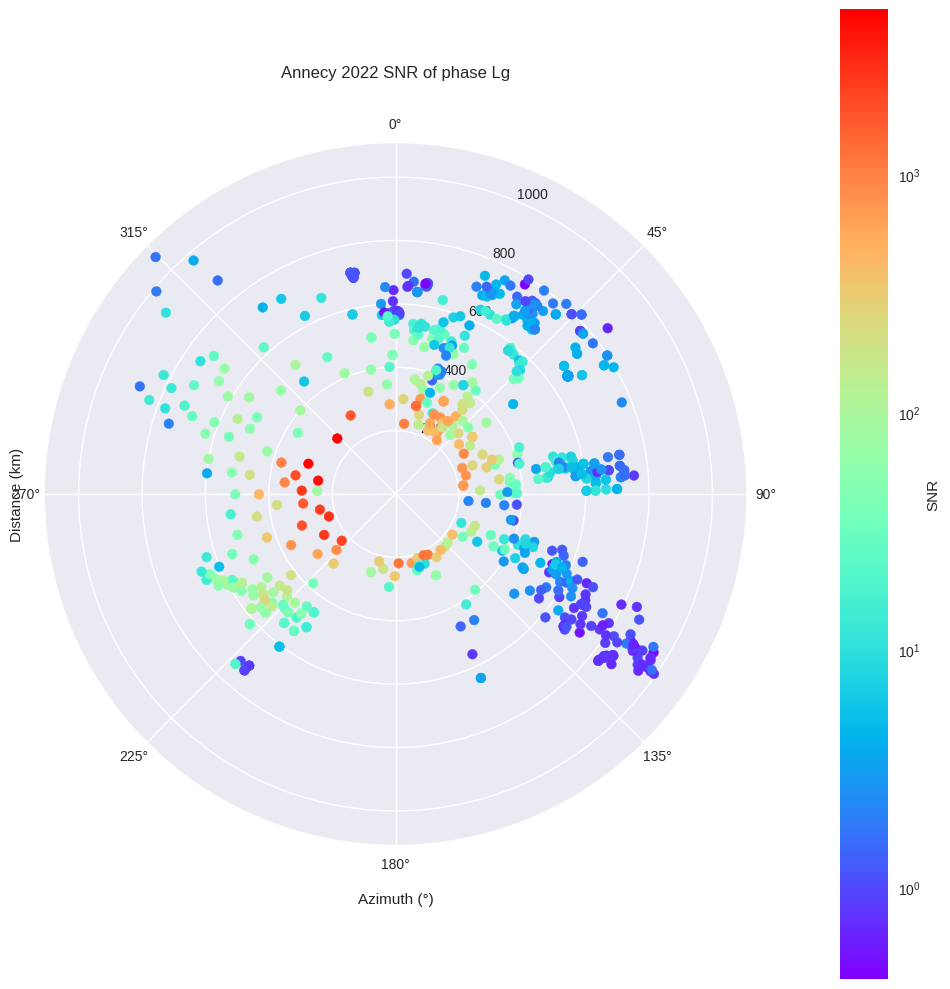

In [28]:
snr_az = snr_azimuth(stations_with_snr, column=13, barlabel="SNR", xlabel="Azimuth (°)", ylabel="Distance (km)", title="SNR", event_name='Annecy 2022', savefig=True, show=True)